# Medical Expenditure Tutorial

## This tutorial demonstrates classification model learning with bias mitigation as a part of a Care Management use case using Medical Expenditure data.

The notebook demonstrates how the AIF 360 toolkit can be used to detect and reduce bias when learning classifiers using a variety of fairness metrics and algorithms . It also demonstrates how explanations can be generated for predictions made by models learnt with the toolkit using LIME.

Classifiers are built using Logistic Regression as well as Random Forests.

Bias detection is demonstrated using several metrics, including disparate impact, average odds difference, statistical parity difference, equal opportunity difference, and Theil index.

Bias alleviation is explored via a variety of methods, including reweighing (pre-processing algorithm), prejudice remover (in-processing algorithm), and disparate impact remover (pre-processing technique).

Data from the [Medical Expenditure Panel Survey](https://meps.ahrq.gov/mepsweb/) is used in this tutorial. See [Section 2](#data_used) below for more details.


<a id="toc"></a>

## Table of Contents

[1. Use Case](#use_case)<br>
[2. Data Used](#data_used)<br>
[3. Learning model (from 2015 Panel 19 data)](#2015-data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1. Load data & create splits for learning/validating/testing model](#2015-data-load)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2. Learning model from original data](#original-2015-data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.1. Metrics for original data](#original-2015-metrics)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.2. Learning Logistic Regression (LR) classifier from original data](#lr_orig)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.2.1. Training LR model from original data](#lr-train)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.2.2. Validating LR model from original data](#lr-validate)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.2.3. Testing LR model from original data](#lr-test)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.3. Learning Random Forest (RF) classifier from original data](#rf_orig)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.3.1. Training RF model from original data](#rf-train)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.3.2. Validating RF model from original data](#rf-validate)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.3.3. Testing RF model from original data](#rf-test)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.3 Bias Mitigation using pre-processing technique - Reweighing](#reweighing-2015)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.1. Transform data](#reweighing-2015-transform)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.2. Metrics for transformed data](#reweighing-2015-metrics)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.3. Learning Logistic Regression (LR) classifier from data transformed by reweighing](#lr_transf)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.3.1. Training LR model after reweighing](#lr-rw-train)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.3.2. Validating LR model after reweighing](#lr-rw-validate)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.3.3. Testing LR model after reweighing](#lr-rw-test)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.4. Learning Random Forest classifier (RF) from data transformed by reweighing](#rf_transf)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.4.1. Training RF model after reweighing](#rf-rw-train)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.4.2. Validating RF model after reweighing](#rf-rw-validate)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3.4.3. Testing RF model after reweighing](#rf-rw-test)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.4. Bias Mitigation using in-processing technique - Prejudice Remover (PR)](#kamishima)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.4.1. Training PR model](#ks-train)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.4.2. Validating PR model](#ks-validate)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.4.3. Testing PR model](#ks-test)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.5. Bias Mitigation using pre-processing technique - Disparate Impact Remover (DIR)](#disparate-impact)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.5.1. Training DIR model](#di-train)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.5.2. Validating DIR model](#di-validate)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.5.3. Testing DIR model](#di-test)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.6. Summary of Model Learning Results](#summary-2015-learning)<br>
[4. Deploying model](#deployment-2015-2015)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.1. Testing learned model on 2015 Panel 20 deployment data](#deployment-2015)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.2. Generating explanations for model predictions on 2015 Panel 20 deployment data using LIME](#lime)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.3. Testing learned model on 2016 Panel 21 deployment data](#deployment-2016)<br>
[5. Re-learning model (from 2016 Panel 21 data)](#learning-2016)<br>
[6. Re-deploying Model](#deployment-2016-2016)<br>
[7. Overall Summary](#final-summary)<br>

<a id="use_case"></a>

## 1. Use Case

[Back to TOC](#toc)<br>

In order to demonstrate how AIF 360 can be used to detect and mitigate bias in classfier models, we adopt the following use case:

a) a data scientist develops a 'fair' healthcare utilization scoring model with respect to defined protected classes. Fairness may be dictated by legal or government regulations, such as a requirement that additional care decisions be not predicated on factors such as race of the patient.

b) developer takes the model AND performance characteristics / specs of the model (e.g. accuracy, fairness tests, etc. basically the model factsheet) and deploys the model in an enterprise app that prioritizes cases for care management.

c) the app is put into production and starts scoring people and making recommendations. 

d) explanations are generated for each recommendation

e) both recommendations and associated explanations are given to nurses as a part of the care management process. The nurses can evaluate the recommendations for quality and correctness and provide feedback.

f) nurse feedback as well as analysis of usage data with respect to specs of the model w.r.t accuracy and fairness is communicated to AI Ops specialist and LOB user periodically.

g) when significant drift in model specs relative to the model factsheet is observed, the model is sent back for retraining.

<a id="use_case"></a>

<a id="data_used"></a>

## 2. Data used

[Back to TOC](#toc)<br>

The specific data used is the [2015 Full Year Consolidated Data File](https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-181) as well as the [2016 Full Year Consolidated Data File](https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-192).

The 2015 file contains data from rounds 3,4,5 of panel 19 (2014) and rounds 1,2,3 of panel 20 (2015). The 2016 file contains data from rounds 3,4,5 of panel 20 (2015) and rounds 1,2,3 of panel 21 (2016).

For this demonstration, three datasets were constructed: one from panel 19, round 5 (used for learning models), one from panel 20, round 3 (used for deployment/testing of model - steps); the other from panel 21, round 3 (used for re-training and deployment/testing of updated model).

For each dataset, the sensitive attribute is 'RACE' constructed as follows: 'Whites' (privileged class) defined by the features RACEV2X = 1 (White) and HISPANX = 2 (non Hispanic); 'Non-Whites' that included everyone else.  

Along with race as the sensitive feature, other features used for modeling include demographics  (such as age, gender, active duty status), physical/mental health assessments, diagnosis codes (such as history of diagnosis of cancer, or diabetes), and limitations (such as cognitive or hearing or vision limitation).

To measure utilization, a composite feature, 'UTILIZATION', was created to measure the total number of trips requiring some sort of medical care by summing up the following features: OBTOTV15(16), the number of office based visits;  OPTOTV15(16), the number of outpatient visits; ERTOT15(16), the number of ER visits;  IPNGTD15(16), the number of inpatient nights, and  + HHTOTD16, the number of home health visits.

The model classification task is to predict whether a person would have 'high' utilization (defined as UTILIZATION >= 10, roughly the average utilization for the considered population). High utilization respondents constituted around 17% of each dataset.

To simulate the scenario, each dataset is split into 3 parts: a train, a validation, and a test/deployment part.

We assume that the model is initially built and tuned using the 2015 Panel 19 train/test data. (Use case steps a-b.)
It is then put into practice and used to score people to identify potential candidates for care management (Use case steps c-e). Initial deployment is simulated to 2015 Panel 20 test/deployment data. To show change in performance and/or fairness over time, (use case steps f-g), the 2016 Panel 21 test/deployment data is used. Finally, if drift is observed, the 2016 train/validation data is used to learn a new model and evaluated again on the 2016 test/deployment data

In [1]:
# Load all necessary packages
import sys
sys.path.append("../")
import numpy as np

#Datasets
from aiflearn.datasets.meps_dataset_panel19_fy2015 import MEPSDataset19
from aiflearn.datasets.meps_dataset_panel20_fy2015 import MEPSDataset20
from aiflearn.datasets.meps_dataset_panel21_fy2016 import MEPSDataset21

#Fairness Metrics
from aiflearn.metrics import BinaryLabelDatasetMetric
from aiflearn.metrics import ClassificationMetric

#Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score

#Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Bias Mitigation Techniques
from aiflearn.algorithms.preprocessing.reweighing import Reweighing
from aiflearn.algorithms.inprocessing.prejudice_remover import PrejudiceRemover
from aiflearn.algorithms.preprocessing import DisparateImpactRemover


from IPython.display import Markdown, display
%matplotlib inline

import matplotlib.pyplot as plt

#LIME
from aiflearn.datasets.lime_encoder import LimeEncoder
import lime
import lime.lime_tabular


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<a id="2015-data"></a>

## 3. Learning model (from 2015 Panel 19 data)

[Back to TOC](#toc)<br>

<a id="2015-data-load"></a>

### 3.1. Load data & create splits for learning/validating/testing model

[Back to TOC](#toc)<br>

In [2]:
# Get the dataset and split into train, validate, and test
seed = 1
np.random.seed(seed)
split_1 = 0.5
split_2 = 0.8
shuffle=True

dataset_orig_panel19 = MEPSDataset19()
dataset_orig_panel19_train, dataset_orig_panel19_validate, dataset_orig_panel19_test = \
                                    dataset_orig_panel19.split([split_1,split_2], shuffle=shuffle)

sens_attr = dataset_orig_panel19_train.protected_attribute_names[0]

**Show 2015 dataset details**

In [3]:
# print out some labels, names, etc.
display(Markdown("#### Training Dataset shape"))
print(dataset_orig_panel19_train.features.shape)
display(Markdown("#### Validation Dataset shape"))
print(dataset_orig_panel19_validate.features.shape)
display(Markdown("#### Test Dataset shape"))
print(dataset_orig_panel19_test.features.shape)
display(Markdown("#### Favorable and unfavorable labels"))
print(dataset_orig_panel19_train.favorable_label, dataset_orig_panel19_train.unfavorable_label)
display(Markdown("#### Protected attribute names"))
print(dataset_orig_panel19_train.protected_attribute_names)
display(Markdown("#### Privileged and unprivileged protected attribute values"))
print(dataset_orig_panel19_train.privileged_protected_attributes, 
      dataset_orig_panel19_train.unprivileged_protected_attributes)
display(Markdown("#### Dataset feature names"))
print(dataset_orig_panel19_train.feature_names)

#### Training Dataset shape

(7915, 138)


#### Validation Dataset shape

(4749, 138)


#### Test Dataset shape

(3166, 138)


#### Favorable and unfavorable labels

1.0 0.0


#### Protected attribute names

['RACE']


#### Privileged and unprivileged protected attribute values

[array([1.])] [array([0.])]


#### Dataset feature names

['RACE', 'AGE', 'PCS42', 'K6SUM42', 'MCS42', 'REGION=1', 'REGION=2', 'REGION=3', 'REGION=4', 'SEX=1', 'SEX=2', 'MARRY=1', 'MARRY=2', 'MARRY=3', 'MARRY=4', 'MARRY=5', 'MARRY=6', 'MARRY=7', 'MARRY=8', 'MARRY=9', 'MARRY=10', 'FTSTU=-1', 'FTSTU=1', 'FTSTU=2', 'FTSTU=3', 'ACTDTY=1', 'ACTDTY=2', 'ACTDTY=3', 'ACTDTY=4', 'HONRDC=1', 'HONRDC=2', 'HONRDC=3', 'HONRDC=4', 'RTHLTH=-1', 'RTHLTH=1', 'RTHLTH=2', 'RTHLTH=3', 'RTHLTH=4', 'RTHLTH=5', 'MNHLTH=-1', 'MNHLTH=1', 'MNHLTH=2', 'MNHLTH=3', 'MNHLTH=4', 'MNHLTH=5', 'HIBPDX=-1', 'HIBPDX=1', 'HIBPDX=2', 'CHDDX=-1', 'CHDDX=1', 'CHDDX=2', 'ANGIDX=-1', 'ANGIDX=1', 'ANGIDX=2', 'MIDX=-1', 'MIDX=1', 'MIDX=2', 'OHRTDX=-1', 'OHRTDX=1', 'OHRTDX=2', 'STRKDX=-1', 'STRKDX=1', 'STRKDX=2', 'EMPHDX=-1', 'EMPHDX=1', 'EMPHDX=2', 'CHBRON=-1', 'CHBRON=1', 'CHBRON=2', 'CHOLDX=-1', 'CHOLDX=1', 'CHOLDX=2', 'CANCERDX=-1', 'CANCERDX=1', 'CANCERDX=2', 'DIABDX=-1', 'DIABDX=1', 'DIABDX=2', 'JTPAIN=-1', 'JTPAIN=1', 'JTPAIN=2', 'ARTHDX=-1', 'ARTHDX=1', 'ARTHDX=2', 'ARTHTYPE=-1'

<a id="original-2015-data"></a>

### 3.2. Learning model from original data

[Back to TOC](#toc)<br>

<a id="original-2015-metrics"></a>

#### 3.2.1. Metrics for original data

In [4]:
# Metric for the original dataset
sens_idx = dataset_orig_panel19_train.protected_attribute_names.index(sens_attr)
privileged_groups =  [{sens_attr:dataset_orig_panel19_train.privileged_protected_attributes[sens_idx][0]}]
unprivileged_groups = [{sens_attr:dataset_orig_panel19_train.unprivileged_protected_attributes[sens_idx][0]}]
metric_orig_panel19_train = BinaryLabelDatasetMetric(dataset_orig_panel19_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between privileged and unprivileged groups = %f" % \
                                                  metric_orig_panel19_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between privileged and unprivileged groups = -0.136594


<a id="lr_orig"></a>

#### 3.2.2. Learning Logistic Regression (LR) classifier from original data

<a id="lr-train"></a>

#### 3.2.2.1. Training LR model from original data

In [5]:
#Train model on given dataset

dataset = dataset_orig_panel19_train  # data to train on

scale = StandardScaler().fit(dataset.features)   # remember the scale

model = LogisticRegression(random_state = 1)       # model to learn

X_train = scale.transform(dataset.features)      #apply the scale
y_train = dataset.labels.ravel()


model.fit(X_train, y_train,
        sample_weight=dataset.instance_weights)
y_train_pred = model.predict(X_train)

#save model
lr_orig_panel19 = model
lr_scale_orig_panel19 = scale

<a id="lr-validate"></a>

#### 3.2.2.2. Validating LR model from original data

In [6]:
#Validate model on given dataset and find threshold for best balanced accuracy
import numpy as np
from tqdm import tqdm
thresh_arr = np.linspace(0.01, 0.5, 50)

scale = lr_scale_orig_panel19

model = lr_orig_panel19                  #model to validate
dataset = dataset_orig_panel19_validate        #data to validate on

X_validate = scale.transform(dataset.features)   #apply the same scale as applied to the training data
y_validate = dataset.labels.ravel()
y_validate_pred_prob = model.predict_proba(X_validate)


bal_acc_arr = []
disp_imp_arr = []
avg_odds_diff_arr = []
stat_par_diff = []
eq_opp_diff = []
theil_ind = []
    
for thresh in tqdm(thresh_arr):
    y_validate_pred = (y_validate_pred_prob[:,1] > thresh).astype(np.double)

    dataset_pred = dataset.copy()
    dataset_pred.labels = y_validate_pred

    classified_metric = ClassificationMetric(dataset, 
                                                 dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    
    bal_acc = 0.5*(classified_metric.true_positive_rate() + classified_metric.true_negative_rate())
    
    acc = accuracy_score(y_true=dataset.labels,
                            y_pred=dataset_pred.labels)
    bal_acc_arr.append(bal_acc)
    avg_odds_diff_arr.append(classified_metric.average_odds_difference())
    disp_imp_arr.append(metric_pred.disparate_impact())
    stat_par_diff.append(classified_metric.statistical_parity_difference())
    eq_opp_diff.append(classified_metric.equal_opportunity_difference())
    theil_ind.append(classified_metric.theil_index())

    
thresh_arr_best_ind = np.where(bal_acc_arr == np.max(bal_acc_arr))[0][0]
thresh_arr_best = np.array(thresh_arr)[thresh_arr_best_ind]

best_bal_acc = bal_acc_arr[thresh_arr_best_ind]
disp_imp_at_best_bal_acc = np.abs(1.0-np.array(disp_imp_arr))[thresh_arr_best_ind]

avg_odds_diff_at_best_bal_acc = avg_odds_diff_arr[thresh_arr_best_ind]

stat_par_diff_at_best_bal_acc = stat_par_diff[thresh_arr_best_ind]
eq_opp_diff_at_best_bal_acc = eq_opp_diff[thresh_arr_best_ind]
theil_ind_at_best_bal_acc = theil_ind[thresh_arr_best_ind]

100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 176.05it/s]


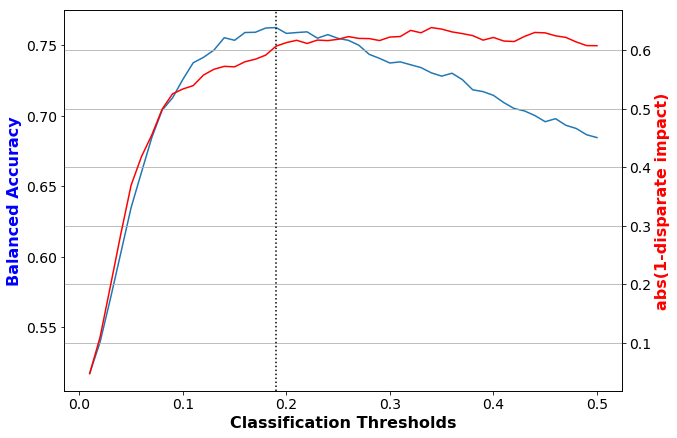

In [7]:
#Plot balanced accuracy, abs(1-disparate impact)

fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(thresh_arr, bal_acc_arr)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(thresh_arr, np.abs(1.0-np.array(disp_imp_arr)), color='r')
ax2.set_ylabel('abs(1-disparate impact)', color='r', fontsize=16, fontweight='bold')

ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind], 
            color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)


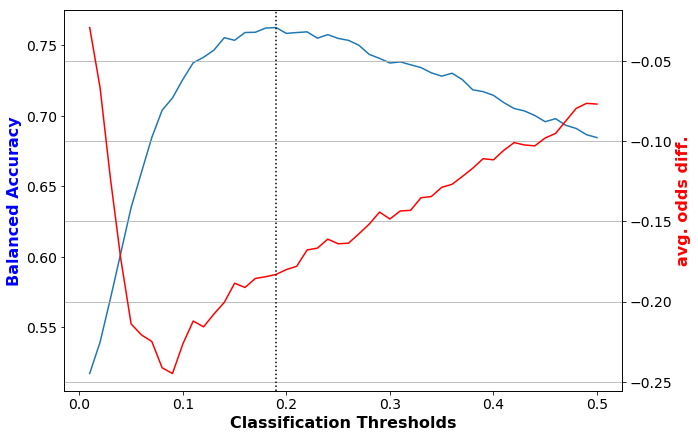

In [8]:
#Plot average odds difference
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(thresh_arr, bal_acc_arr)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(thresh_arr, avg_odds_diff_arr, color='r')
ax2.set_ylabel('avg. odds diff.', color='r', fontsize=16, fontweight='bold')

ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind], color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

In [9]:
lr_thresh_arr_orig_panel19_best = thresh_arr_best
print("Threshold corresponding to Best balanced accuracy: %6.4f" % lr_thresh_arr_orig_panel19_best)
lr_best_bal_acc_arr_orig_panel19 = best_bal_acc
print("Best balanced accuracy: %6.4f" % lr_best_bal_acc_arr_orig_panel19)
lr_disp_imp_at_best_bal_acc_orig_panel19 = disp_imp_at_best_bal_acc
print("Corresponding abs(1-disparate impact) value: %6.4f" % lr_disp_imp_at_best_bal_acc_orig_panel19)
lr_avg_odds_diff_at_best_bal_acc_orig_panel19 = avg_odds_diff_at_best_bal_acc
print("Corresponding average odds difference value: %6.4f" % lr_avg_odds_diff_at_best_bal_acc_orig_panel19)
lr_stat_par_diff_at_best_bal_acc_orig_panel19 = stat_par_diff_at_best_bal_acc
print("Corresponding statistical parity difference value: %6.4f" % lr_stat_par_diff_at_best_bal_acc_orig_panel19)
lr_eq_opp_diff_at_best_bal_acc_orig_panel19 = eq_opp_diff_at_best_bal_acc
print("Corresponding equal opportunity difference value: %6.4f" % lr_eq_opp_diff_at_best_bal_acc_orig_panel19)
lr_theil_ind_at_best_bal_acc_orig_panel19 = theil_ind_at_best_bal_acc
print("Corresponding Theil index value: %6.4f" % lr_theil_ind_at_best_bal_acc_orig_panel19)

Threshold corresponding to Best balanced accuracy: 0.1900
Best balanced accuracy: 0.7627
Corresponding abs(1-disparate impact) value: 0.6066
Corresponding average odds difference value: -0.1831
Corresponding statistical parity difference value: -0.2643
Corresponding equal opportunity difference value: -0.1608
Corresponding Theil index value: 0.0936


<a id="lr-test"></a>

#### 3.2.2.3. Testing LR model from original data

In [10]:
#Evaluate performance of a given model with a given threshold on a given dataset

scale = lr_scale_orig_panel19

dataset = dataset_orig_panel19_test   #apply model to this data
model = lr_orig_panel19               #this is the model applied
                                   #lr_transf_panel19 is LR model learned from Panel panel19 (panel1914)
                                   #transformed data
thresh_arr = lr_thresh_arr_orig_panel19_best  # lr_thresh_arr_transf_panel19_best wass threshold for LR
                                            # model with highest balanced accuracy


X_data = scale.transform(dataset.features)
y_data = dataset.labels.ravel()
y_data_pred_prob = model.predict_proba(X_data)  

    
y_pred = (y_data_pred_prob[:,1] > thresh_arr).astype(np.double)

dataset_pred = dataset.copy()
dataset_pred.labels = y_pred

classified_metric = ClassificationMetric(dataset, 
                                        dataset_pred,
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)
metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)
    
TPR = classified_metric.true_positive_rate()
TNR = classified_metric.true_negative_rate()
bal_acc = 0.5*(TPR+TNR)
    
acc = accuracy_score(y_true=dataset.labels,
                    y_pred=dataset_pred.labels)

#get results
best_bal_acc = bal_acc
disp_imp_at_best_bal_acc = np.abs(1.0-metric_pred.disparate_impact())

avg_odds_diff_at_best_bal_acc = classified_metric.average_odds_difference()

stat_par_diff_at_best_bal_acc = classified_metric.statistical_parity_difference()
eq_opp_diff_at_best_bal_acc = classified_metric.equal_opportunity_difference()
theil_ind_at_best_bal_acc = classified_metric.theil_index()

In [11]:
lr_thresh_arr_orig_panel19_best_test = thresh_arr_best
print("Threshold corresponding to Best balanced accuracy: %6.4f" % lr_thresh_arr_orig_panel19_best_test)
lr_best_bal_acc_arr_orig_panel19_best_test = best_bal_acc
print("Best balanced accuracy: %6.4f" % lr_best_bal_acc_arr_orig_panel19_best_test)
lr_disp_imp_at_best_bal_acc_orig_panel19_best_test = disp_imp_at_best_bal_acc
print("Corresponding abs(1-disparate impact) value: %6.4f" % lr_disp_imp_at_best_bal_acc_orig_panel19_best_test)
lr_avg_odds_diff_at_best_bal_acc_orig_panel19_best_test = avg_odds_diff_at_best_bal_acc
print("Corresponding average odds difference value: %6.4f" % lr_avg_odds_diff_at_best_bal_acc_orig_panel19_best_test)

lr_stat_par_diff_at_best_bal_acc_orig_panel19_best_test = stat_par_diff_at_best_bal_acc
print("Corresponding statistical parity difference value: %6.4f" % lr_stat_par_diff_at_best_bal_acc_orig_panel19_best_test)
lr_eq_opp_diff_at_best_bal_acc_orig_panel19_best_test = eq_opp_diff_at_best_bal_acc
print("Corresponding equal opportunity difference value: %6.4f" % lr_eq_opp_diff_at_best_bal_acc_orig_panel19_best_test)
lr_theil_ind_at_best_bal_acc_orig_panel19_best_test = theil_ind_at_best_bal_acc
print("Corresponding Theil index value: %6.4f" % lr_theil_ind_at_best_bal_acc_orig_panel19_best_test)

Threshold corresponding to Best balanced accuracy: 0.1900
Best balanced accuracy: 0.7759
Corresponding abs(1-disparate impact) value: 0.5738
Corresponding average odds difference value: -0.2057
Corresponding statistical parity difference value: -0.2612
Corresponding equal opportunity difference value: -0.2228
Corresponding Theil index value: 0.0921


For all the fairness metrics displayed above, the value should be close to '0' for fairness.

abs(1-disparate impact) is typically desired to be < 0.2 for classifier predictions to be fair.

However, for a logistic regression classifier trained with original training data, at the best classification rate, this is quite high. This implies unfairness.

Similarly, average odds difference = 0.5((FPR_unpriv-FPR_priv)+(TPR_unpriv-TPR_priv)) must be close to zero for the classifier to be fair.

For a logistic regression classifier trained with original training data, at the best classification rate, this is still high. This still implies unfairness.

<a id="rf_orig"></a>

#### 3.2.3. Learning Random Forest (RF) classifier from original data

<a id="rf-train"></a>

#### 3.2.3.1. Training RF model from original data

In [12]:
#Train model on given dataset

dataset = dataset_orig_panel19_train  # data to train on

scale = StandardScaler().fit(dataset.features)   # remember the scale

nestimators = 500
minsamplesleaf = 25

model = RandomForestClassifier(n_estimators = nestimators, min_samples_leaf = minsamplesleaf)

X_train = scale.transform(dataset.features)      #apply the scale
y_train = dataset.labels.ravel()


model.fit(X_train, y_train,
        sample_weight=dataset.instance_weights)
y_train_pred = model.predict(X_train)

#save model
rf_orig_panel19 = model
rf_scale_orig_panel19 = scale

<a id="rf-validate"></a>

#### 3.2.3.2. Validating RF model from original data

In [13]:
#validate model on given dataset and find threshold for best balanced accuracy
import numpy as np
from tqdm import tqdm
thresh_arr = np.linspace(0.01, 0.5, 50)

scale = rf_scale_orig_panel19

model = rf_orig_panel19                  #model to validate
dataset = dataset_orig_panel19_validate        #data to validate on

X_validate = scale.transform(dataset.features)   #apply the same scale as applied to the training data
y_validate = dataset.labels.ravel()
y_validate_pred_prob = model.predict_proba(X_validate)


bal_acc_arr = []
disp_imp_arr = []
avg_odds_diff_arr = []   
stat_par_diff = []
eq_opp_diff = []
theil_ind = []
    
for thresh in tqdm(thresh_arr):
    y_validate_pred = (y_validate_pred_prob[:,1] > thresh).astype(np.double)

    dataset_pred = dataset.copy()
    dataset_pred.labels = y_validate_pred

    classified_metric = ClassificationMetric(dataset, 
                                                 dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    
    bal_acc = 0.5*(classified_metric.true_positive_rate() + classified_metric.true_negative_rate())
    
    acc = accuracy_score(y_true=dataset.labels,
                            y_pred=dataset_pred.labels)
    bal_acc_arr.append(bal_acc)
    avg_odds_diff_arr.append(classified_metric.average_odds_difference())
    disp_imp_arr.append(metric_pred.disparate_impact())
    stat_par_diff.append(classified_metric.statistical_parity_difference())
    eq_opp_diff.append(classified_metric.equal_opportunity_difference())
    theil_ind.append(classified_metric.theil_index())
    
thresh_arr_best_ind = np.where(bal_acc_arr == np.max(bal_acc_arr))[0][0]
thresh_arr_best = np.array(thresh_arr)[thresh_arr_best_ind]

best_bal_acc = bal_acc_arr[thresh_arr_best_ind]
disp_imp_at_best_bal_acc = np.abs(1.0-np.array(disp_imp_arr))[thresh_arr_best_ind]

avg_odds_diff_at_best_bal_acc = avg_odds_diff_arr[thresh_arr_best_ind]

stat_par_diff_at_best_bal_acc = stat_par_diff[thresh_arr_best_ind]
eq_opp_diff_at_best_bal_acc = eq_opp_diff[thresh_arr_best_ind]
theil_ind_at_best_bal_acc = theil_ind[thresh_arr_best_ind]

100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 176.05it/s]


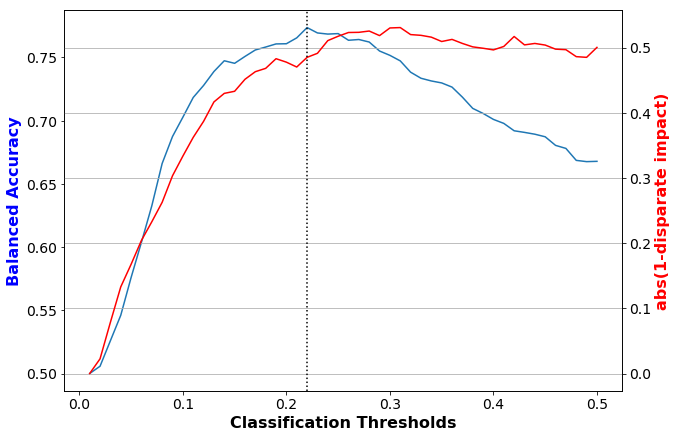

In [14]:
#Plot balanced accuracy, abs(1-disparate impact)

fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(thresh_arr, bal_acc_arr)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(thresh_arr, np.abs(1.0-np.array(disp_imp_arr)), color='r')
ax2.set_ylabel('abs(1-disparate impact)', color='r', fontsize=16, fontweight='bold')

ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind], 
            color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)


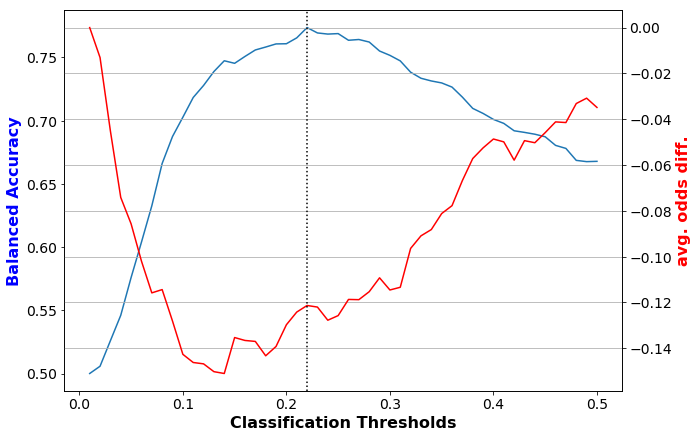

In [15]:
#Plot average odds difference
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(thresh_arr, bal_acc_arr)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(thresh_arr, avg_odds_diff_arr, color='r')
ax2.set_ylabel('avg. odds diff.', color='r', fontsize=16, fontweight='bold')

ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind], color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

In [16]:
rf_thresh_arr_orig_panel19_best = thresh_arr_best
print("Threshold corresponding to Best balanced accuracy: %6.4f" % rf_thresh_arr_orig_panel19_best)
rf_best_bal_acc_arr_orig_panel19 = best_bal_acc
print("Best balanced accuracy: %6.4f" % rf_best_bal_acc_arr_orig_panel19)
rf_disp_imp_at_best_bal_acc_orig_panel19 = disp_imp_at_best_bal_acc
print("Corresponding abs(1-disparate impact) value: %6.4f" % rf_disp_imp_at_best_bal_acc_orig_panel19)
rf_avg_odds_diff_at_best_bal_acc_orig_panel19 = avg_odds_diff_at_best_bal_acc
print("Corresponding average odds difference value: %6.4f" % rf_avg_odds_diff_at_best_bal_acc_orig_panel19)

rf_stat_par_diff_at_best_bal_acc_orig_panel19 = stat_par_diff_at_best_bal_acc
print("Corresponding statistical parity difference value: %6.4f" % rf_stat_par_diff_at_best_bal_acc_orig_panel19)
rf_eq_opp_diff_at_best_bal_acc_orig_panel19 = eq_opp_diff_at_best_bal_acc
print("Corresponding equal opportunity difference value: %6.4f" % rf_eq_opp_diff_at_best_bal_acc_orig_panel19)
rf_theil_ind_at_best_bal_acc_orig_panel19 = theil_ind_at_best_bal_acc
print("Corresponding Theil index value: %6.4f" % rf_theil_ind_at_best_bal_acc_orig_panel19)

Threshold corresponding to Best balanced accuracy: 0.2200
Best balanced accuracy: 0.7735
Corresponding abs(1-disparate impact) value: 0.4850
Corresponding average odds difference value: -0.1213
Corresponding statistical parity difference value: -0.1984
Corresponding equal opportunity difference value: -0.1128
Corresponding Theil index value: 0.0895


<a id="rf-test"></a>

#### 3.2.3.3. Testing RF model from original data

In [17]:
#Evaluate performance of a given model with a given threshold on a given dataset

scale = rf_scale_orig_panel19

dataset = dataset_orig_panel19_test   #apply model to this data
model = rf_orig_panel19               #this is the model applied
                                   #lr_transf_panel19 is LR model learned from Panel panel19 (panel1914)
                                   #transformed data
thresh_arr = rf_thresh_arr_orig_panel19_best  # lr_thresh_arr_transf_panel19_best wass threshold for LR
                                            # model with highest balanced accuracy


X_data = scale.transform(dataset.features)
y_data = dataset.labels.ravel()
y_data_pred_prob = model.predict_proba(X_data)  

    
y_pred = (y_data_pred_prob[:,1] > thresh_arr).astype(np.double)

dataset_pred = dataset.copy()
dataset_pred.labels = y_pred

classified_metric = ClassificationMetric(dataset, 
                                        dataset_pred,
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)
metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)
    
TPR = classified_metric.true_positive_rate()
TNR = classified_metric.true_negative_rate()
bal_acc = 0.5*(TPR+TNR)
    
acc = accuracy_score(y_true=dataset.labels,
                    y_pred=dataset_pred.labels)

#get results
best_bal_acc = bal_acc
disp_imp_at_best_bal_acc = np.abs(1.0-metric_pred.disparate_impact())

avg_odds_diff_at_best_bal_acc = classified_metric.average_odds_difference()

stat_par_diff_at_best_bal_acc = classified_metric.statistical_parity_difference()
eq_opp_diff_at_best_bal_acc = classified_metric.equal_opportunity_difference()
theil_ind_at_best_bal_acc = classified_metric.theil_index()

In [18]:
rf_thresh_arr_orig_panel19_best_test = thresh_arr_best
print("Threshold corresponding to Best balanced accuracy: %6.4f" % rf_thresh_arr_orig_panel19_best_test)
rf_best_bal_acc_arr_orig_panel19_best_test = best_bal_acc
print("Best balanced accuracy: %6.4f" % rf_best_bal_acc_arr_orig_panel19_best_test)
rf_disp_imp_at_best_bal_acc_orig_panel19_best_test = disp_imp_at_best_bal_acc
print("Corresponding abs(1-disparate impact) value: %6.4f" % rf_disp_imp_at_best_bal_acc_orig_panel19_best_test)
rf_avg_odds_diff_at_best_bal_acc_orig_panel19_best_test = avg_odds_diff_at_best_bal_acc
print("Corresponding average odds difference value: %6.4f" % rf_avg_odds_diff_at_best_bal_acc_orig_panel19_best_test)

rf_stat_par_diff_at_best_bal_acc_orig_panel19_best_test = stat_par_diff_at_best_bal_acc
print("Corresponding statistical parity difference value: %6.4f" % rf_stat_par_diff_at_best_bal_acc_orig_panel19_best_test)
rf_eq_opp_diff_at_best_bal_acc_orig_panel19_best_test = eq_opp_diff_at_best_bal_acc
print("Corresponding equal opportunity difference value: %6.4f" % rf_eq_opp_diff_at_best_bal_acc_orig_panel19_best_test)
rf_theil_ind_at_best_bal_acc_orig_panel19_best_test = theil_ind_at_best_bal_acc
print("Corresponding Theil index value: %6.4f" % rf_theil_ind_at_best_bal_acc_orig_panel19_best_test)

Threshold corresponding to Best balanced accuracy: 0.2200
Best balanced accuracy: 0.7682
Corresponding abs(1-disparate impact) value: 0.5021
Corresponding average odds difference value: -0.1409
Corresponding statistical parity difference value: -0.2182
Corresponding equal opportunity difference value: -0.1222
Corresponding Theil index value: 0.0933


As in the case of the logistic regression classifier learnt from the original data, the fairness metrics for the random forest classifier have values that are quite far from 0.

For example, abs(1-disparate impact) has a value of over 0.5 as opposed to the typical desired value of < 0.2.

This indicates that the random forest classifier learnt from the original data is also unfair.

<a id="reweighing-2015"></a>

### 3.3. Bias Mitigation using pre-processing technique - Reweighing

[Back to TOC](#toc)<br>

<a id="reweighing-2015-transform"></a>

#### 3.3.1. Transform data

In [19]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,
               privileged_groups=privileged_groups)
RW.fit(dataset_orig_panel19_train)
dataset_transf_panel19_train = RW.transform(dataset_orig_panel19_train)

<a id="reweighing-2015-metrics"></a>

#### 3.3.2. Metrics for transformed data

In [20]:
metric_transf_panel19_train = BinaryLabelDatasetMetric(dataset_transf_panel19_train, 
                                         unprivileged_groups=unprivileged_groups,
                                         privileged_groups=privileged_groups)
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between privileged and unprivileged groups = %f" % \
                                                  metric_transf_panel19_train.mean_difference())

#### Transformed training dataset

Difference in mean outcomes between privileged and unprivileged groups = 0.000000


<a id="lr_transf"></a>

#### 3.3.3. Learning Logistic Regression (LR) classifier from data transformed by reweighing

<a id="lr-rw-train"></a>

#### 3.3.3.1. Training LR model after reweighing

In [21]:
#Train model on given dataset

dataset = dataset_transf_panel19_train  # data to train on

scale = StandardScaler().fit(dataset.features)   # remember the scale

model = LogisticRegression(random_state = 1)       # model to learn

X_train = scale.transform(dataset.features)      #apply the scale

y_train = dataset.labels.ravel()


model.fit(X_train, y_train,
        sample_weight=dataset.instance_weights)
y_train_pred = model.predict(X_train)

#save model
lr_transf_panel19 = model
lr_scale_transf_panel19 = scale

<a id="lr-rw-validate"></a>

#### 3.3.3.2. Validating  LR model after reweighing

In [22]:
#validate model on given dataset and find threshold for best balanced accuracy
import numpy as np
from tqdm import tqdm
thresh_arr = np.linspace(0.01, 0.5, 50)

scale = lr_scale_transf_panel19

model = lr_transf_panel19                  #model to validate
dataset = dataset_orig_panel19_validate        #data to validate on

X_validate = scale.transform(dataset.features)   #apply the same scale as applied to the training data
y_validate = dataset.labels.ravel()
y_validate_pred_prob = model.predict_proba(X_validate)


bal_acc_arr = []
disp_imp_arr = []
avg_odds_diff_arr = []
stat_par_diff = []
eq_opp_diff = []
theil_ind = []
    
for thresh in tqdm(thresh_arr):
    y_validate_pred = (y_validate_pred_prob[:,1] > thresh).astype(np.double)

    dataset_pred = dataset.copy()
    dataset_pred.labels = y_validate_pred

    classified_metric = ClassificationMetric(dataset, 
                                                 dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    
    bal_acc = 0.5*(classified_metric.true_positive_rate() + classified_metric.true_negative_rate())
    
    acc = accuracy_score(y_true=dataset.labels,
                            y_pred=dataset_pred.labels)
    bal_acc_arr.append(bal_acc)
    avg_odds_diff_arr.append(classified_metric.average_odds_difference())
    disp_imp_arr.append(metric_pred.disparate_impact())
    stat_par_diff.append(classified_metric.statistical_parity_difference())
    eq_opp_diff.append(classified_metric.equal_opportunity_difference())
    theil_ind.append(classified_metric.theil_index())

    
thresh_arr_best_ind = np.where(bal_acc_arr == np.max(bal_acc_arr))[0][0]
thresh_arr_best = np.array(thresh_arr)[thresh_arr_best_ind]

best_bal_acc = bal_acc_arr[thresh_arr_best_ind]
disp_imp_at_best_bal_acc = np.abs(1.0-np.array(disp_imp_arr))[thresh_arr_best_ind]

avg_odds_diff_at_best_bal_acc = avg_odds_diff_arr[thresh_arr_best_ind]

stat_par_diff_at_best_bal_acc = stat_par_diff[thresh_arr_best_ind]
eq_opp_diff_at_best_bal_acc = eq_opp_diff[thresh_arr_best_ind]
theil_ind_at_best_bal_acc = theil_ind[thresh_arr_best_ind]

100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 175.43it/s]


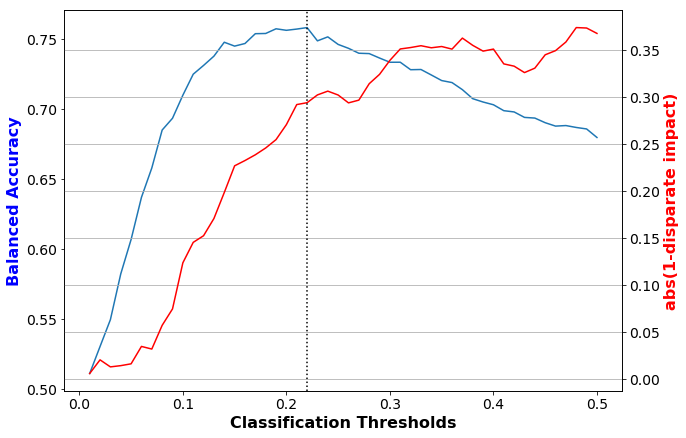

In [23]:
#Plot balanced accuracy, abs(1-disparate impact)

fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(thresh_arr, bal_acc_arr)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(thresh_arr, np.abs(1.0-np.array(disp_imp_arr)), color='r')
ax2.set_ylabel('abs(1-disparate impact)', color='r', fontsize=16, fontweight='bold')

ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind], 
            color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)


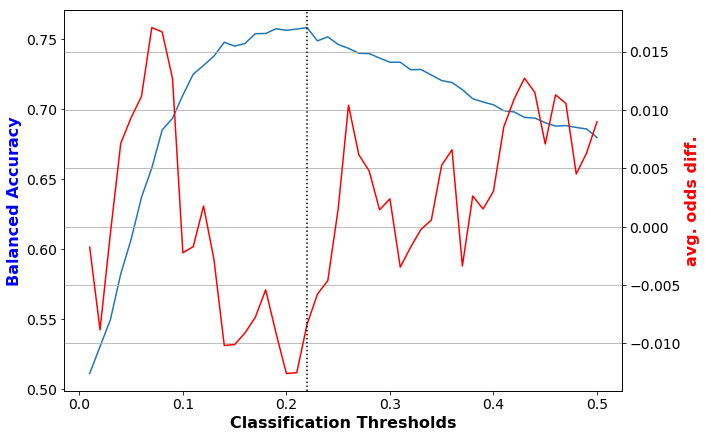

In [24]:
#Plot average odds difference
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(thresh_arr, bal_acc_arr)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(thresh_arr, avg_odds_diff_arr, color='r')
ax2.set_ylabel('avg. odds diff.', color='r', fontsize=16, fontweight='bold')

ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind], color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

In [25]:
lr_thresh_arr_transf_panel19_best = thresh_arr_best
print("Threshold corresponding to Best balanced accuracy: %6.4f" % lr_thresh_arr_transf_panel19_best)
lr_best_bal_acc_arr_transf_panel19 = best_bal_acc
print("Best balanced accuracy: %6.4f" % lr_best_bal_acc_arr_transf_panel19)
lr_disp_imp_at_best_bal_acc_transf_panel19 = disp_imp_at_best_bal_acc
print("Corresponding abs(1-disparate impact) value: %6.4f" % lr_disp_imp_at_best_bal_acc_transf_panel19)
lr_avg_odds_diff_at_best_bal_acc_transf_panel19 = avg_odds_diff_at_best_bal_acc
print("Corresponding average odds difference value: %6.4f" % lr_avg_odds_diff_at_best_bal_acc_transf_panel19)

lr_stat_par_diff_at_best_bal_acc_transf_panel19 = stat_par_diff_at_best_bal_acc
print("Corresponding statistical parity difference value: %6.4f" % lr_stat_par_diff_at_best_bal_acc_transf_panel19)
lr_eq_opp_diff_at_best_bal_acc_transf_panel19 = eq_opp_diff_at_best_bal_acc
print("Corresponding equal opportunity difference value: %6.4f" % lr_eq_opp_diff_at_best_bal_acc_transf_panel19)
lr_theil_ind_at_best_bal_acc_transf_panel19 = theil_ind_at_best_bal_acc
print("Corresponding Theil index value: %6.4f" % lr_theil_ind_at_best_bal_acc_transf_panel19)

Threshold corresponding to Best balanced accuracy: 0.2200
Best balanced accuracy: 0.7581
Corresponding abs(1-disparate impact) value: 0.2939
Corresponding average odds difference value: -0.0084
Corresponding statistical parity difference value: -0.0992
Corresponding equal opportunity difference value: 0.0242
Corresponding Theil index value: 0.0938


<a id="lr-rw-test"></a>

#### 3.3.3.3. Testing  LR model after reweighing

In [26]:
#Evaluate performance of a given model with a given threshold on a given dataset

scale = lr_scale_transf_panel19

dataset = dataset_orig_panel19_test   #apply model to this data
model = lr_transf_panel19               #this is the model applied
                                   #lr_transf_panel19 is LR model learned from Panel 19
                                   #transformed data
thresh_arr = lr_thresh_arr_transf_panel19_best  # lr_thresh_arr_transf_panel19_best wass threshold for LR
                                            # model with highest balanced accuracy


X_data = scale.transform(dataset.features)
y_data = dataset.labels.ravel()
y_data_pred_prob = model.predict_proba(X_data)  

    
y_pred = (y_data_pred_prob[:,1] > thresh_arr).astype(np.double)

dataset_pred = dataset.copy()
dataset_pred.labels = y_pred

classified_metric = ClassificationMetric(dataset, 
                                        dataset_pred,
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)
metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)
    
TPR = classified_metric.true_positive_rate()
TNR = classified_metric.true_negative_rate()
bal_acc = 0.5*(TPR+TNR)
    
acc = accuracy_score(y_true=dataset.labels,
                    y_pred=dataset_pred.labels)

#get results
best_bal_acc = bal_acc
disp_imp_at_best_bal_acc = np.abs(1.0-metric_pred.disparate_impact())

avg_odds_diff_at_best_bal_acc = classified_metric.average_odds_difference()

stat_par_diff_at_best_bal_acc = classified_metric.statistical_parity_difference()
eq_opp_diff_at_best_bal_acc = classified_metric.equal_opportunity_difference()
theil_ind_at_best_bal_acc = classified_metric.theil_index()

In [27]:
lr_thresh_arr_transf_panel19_best_test = thresh_arr_best
print("Threshold corresponding to Best balanced accuracy: %6.4f" % lr_thresh_arr_transf_panel19_best_test)
lr_best_bal_acc_arr_transf_panel19_best_test = best_bal_acc
print("Best balanced accuracy: %6.4f" % lr_best_bal_acc_arr_transf_panel19_best_test)
lr_disp_imp_at_best_bal_acc_transf_panel19_best_test = disp_imp_at_best_bal_acc
print("Corresponding abs(1-disparate impact) value: %6.4f" % lr_disp_imp_at_best_bal_acc_transf_panel19_best_test)
lr_avg_odds_diff_at_best_bal_acc_transf_panel19_best_test = avg_odds_diff_at_best_bal_acc
print("Corresponding average odds difference value: %6.4f" % lr_avg_odds_diff_at_best_bal_acc_transf_panel19_best_test)

lr_stat_par_diff_at_best_bal_acc_transf_panel19_best_test = stat_par_diff_at_best_bal_acc
print("Corresponding statistical parity difference value: %6.4f" % lr_stat_par_diff_at_best_bal_acc_transf_panel19_best_test)
lr_eq_opp_diff_at_best_bal_acc_transf_panel19_best_test = eq_opp_diff_at_best_bal_acc
print("Corresponding equal opportunity difference value: %6.4f" % lr_eq_opp_diff_at_best_bal_acc_transf_panel19_best_test)
lr_theil_ind_at_best_bal_acc_transf_panel19_best_test = theil_ind_at_best_bal_acc
print("Corresponding Theil index value: %6.4f" % lr_theil_ind_at_best_bal_acc_transf_panel19_best_test)

Threshold corresponding to Best balanced accuracy: 0.2200
Best balanced accuracy: 0.7539
Corresponding abs(1-disparate impact) value: 0.2482
Corresponding average odds difference value: -0.0151
Corresponding statistical parity difference value: -0.0872
Corresponding equal opportunity difference value: -0.0035
Corresponding Theil index value: 0.0966


The fairness metrics for the logistic regression model learnt after reweighing are fairly improved, and thus the model is much more fair relative to the logistic regression model learnt from the original data.

<a id="rf_transf"></a>

#### 3.3.4. Learning Random Forest (RF) classifier from data transformed by reweighing

<a id="rf-rw-train"></a>

#### 3.3.4.1. Training  RF model after reweighing

In [28]:
#Train model on given dataset

dataset = dataset_transf_panel19_train  # data to train on

scale = StandardScaler().fit(dataset.features)   # remember the scale

model = RandomForestClassifier(n_estimators = nestimators, min_samples_leaf = minsamplesleaf)

X_train = scale.transform(dataset.features)      #apply the scale

y_train = dataset.labels.ravel()


model.fit(X_train, y_train,
        sample_weight=dataset.instance_weights)
y_train_pred = model.predict(X_train)

#save model
rf_transf_panel19 = model
rf_scale_transf_panel19 = scale

<a id="rf-rw-validate"></a>

#### 3.3.4.2. Validating  RF model after reweighing

In [29]:
#validate model on given dataset and find threshold for best balanced accuracy
import numpy as np
from tqdm import tqdm
thresh_arr = np.linspace(0.01, 0.5, 50)

scale = rf_scale_transf_panel19

model = rf_transf_panel19                  #model to validate
dataset = dataset_orig_panel19_validate        #data to validate on

X_validate = scale.transform(dataset.features)   #apply the same scale as applied to the training data
y_validate = dataset.labels.ravel()
y_validate_pred_prob = model.predict_proba(X_validate)


bal_acc_arr = []
disp_imp_arr = []
avg_odds_diff_arr = []
stat_par_diff = []
eq_opp_diff = []
theil_ind = []
    
for thresh in tqdm(thresh_arr):
    y_validate_pred = (y_validate_pred_prob[:,1] > thresh).astype(np.double)

    dataset_pred = dataset.copy()
    dataset_pred.labels = y_validate_pred

    classified_metric = ClassificationMetric(dataset, 
                                                 dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    
    bal_acc = 0.5*(classified_metric.true_positive_rate() + classified_metric.true_negative_rate())
    
    acc = accuracy_score(y_true=dataset.labels,
                            y_pred=dataset_pred.labels)
    bal_acc_arr.append(bal_acc)
    avg_odds_diff_arr.append(classified_metric.average_odds_difference())
    disp_imp_arr.append(metric_pred.disparate_impact())
    stat_par_diff.append(classified_metric.statistical_parity_difference())
    eq_opp_diff.append(classified_metric.equal_opportunity_difference())
    theil_ind.append(classified_metric.theil_index())

    
thresh_arr_best_ind = np.where(bal_acc_arr == np.max(bal_acc_arr))[0][0]
thresh_arr_best = np.array(thresh_arr)[thresh_arr_best_ind]

best_bal_acc = bal_acc_arr[thresh_arr_best_ind]
disp_imp_at_best_bal_acc = np.abs(1.0-np.array(disp_imp_arr))[thresh_arr_best_ind]

avg_odds_diff_at_best_bal_acc = avg_odds_diff_arr[thresh_arr_best_ind]

stat_par_diff_at_best_bal_acc = stat_par_diff[thresh_arr_best_ind]
eq_opp_diff_at_best_bal_acc = eq_opp_diff[thresh_arr_best_ind]
theil_ind_at_best_bal_acc = theil_ind[thresh_arr_best_ind]

100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 199.99it/s]


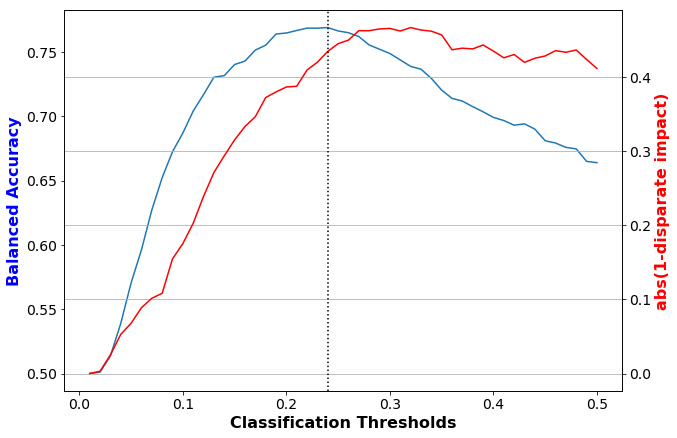

In [30]:
#Plot balanced accuracy, abs(1-disparate impact)

fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(thresh_arr, bal_acc_arr)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(thresh_arr, np.abs(1.0-np.array(disp_imp_arr)), color='r')
ax2.set_ylabel('abs(1-disparate impact)', color='r', fontsize=16, fontweight='bold')

ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind], 
            color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)


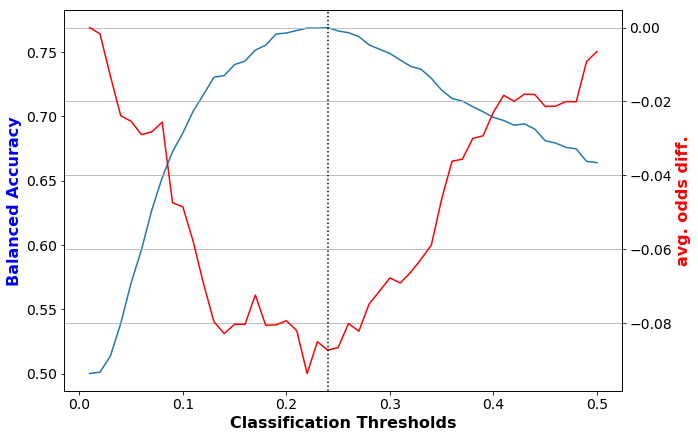

In [31]:
#Plot average odds difference
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(thresh_arr, bal_acc_arr)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(thresh_arr, avg_odds_diff_arr, color='r')
ax2.set_ylabel('avg. odds diff.', color='r', fontsize=16, fontweight='bold')

ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind], color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

In [32]:
rf_thresh_arr_transf_panel19_best = thresh_arr_best
print("Threshold corresponding to Best balanced accuracy: %6.4f" % rf_thresh_arr_transf_panel19_best)
rf_best_bal_acc_arr_transf_panel19 = best_bal_acc
print("Best balanced accuracy: %6.4f" % rf_best_bal_acc_arr_transf_panel19)
rf_disp_imp_at_best_bal_acc_transf_panel19 = disp_imp_at_best_bal_acc
print("Corresponding abs(1-disparate impact) value: %6.4f" % rf_disp_imp_at_best_bal_acc_transf_panel19)
rf_avg_odds_diff_at_best_bal_acc_transf_panel19 = avg_odds_diff_at_best_bal_acc
print("Corresponding average odds difference value: %6.4f" % rf_avg_odds_diff_at_best_bal_acc_transf_panel19)

rf_stat_par_diff_at_best_bal_acc_transf_panel19 = stat_par_diff_at_best_bal_acc
print("Corresponding statistical parity difference value: %6.4f" % rf_stat_par_diff_at_best_bal_acc_transf_panel19)
rf_eq_opp_diff_at_best_bal_acc_transf_panel19 = eq_opp_diff_at_best_bal_acc
print("Corresponding equal opportunity difference value: %6.4f" % rf_eq_opp_diff_at_best_bal_acc_transf_panel19)
rf_theil_ind_at_best_bal_acc_transf_panel19 = theil_ind_at_best_bal_acc
print("Corresponding Theil index value: %6.4f" % rf_theil_ind_at_best_bal_acc_transf_panel19)

Threshold corresponding to Best balanced accuracy: 0.2400
Best balanced accuracy: 0.7690
Corresponding abs(1-disparate impact) value: 0.4350
Corresponding average odds difference value: -0.0874
Corresponding statistical parity difference value: -0.1651
Corresponding equal opportunity difference value: -0.0773
Corresponding Theil index value: 0.0906


<a id="rf-rw-test"></a>

#### 3.3.4.3. Testing  RF model after reweighing

In [33]:
#Evaluate performance of a given model with a given threshold on a given dataset

scale = rf_scale_transf_panel19

dataset = dataset_orig_panel19_test   #apply model to this data
model = rf_transf_panel19               #this is the model applied
                                   #lr_transf_panel19 is LR model learned from Panel 19
                                   #transformed data
thresh_arr = rf_thresh_arr_transf_panel19_best  # lr_thresh_arr_transf_panel19_best wass threshold for LR
                                            # model with highest balanced accuracy


X_data = scale.transform(dataset.features)
y_data = dataset.labels.ravel()
y_data_pred_prob = model.predict_proba(X_data)  

    
y_pred = (y_data_pred_prob[:,1] > thresh_arr).astype(np.double)

dataset_pred = dataset.copy()
dataset_pred.labels = y_pred

classified_metric = ClassificationMetric(dataset, 
                                        dataset_pred,
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)
metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)
    
TPR = classified_metric.true_positive_rate()
TNR = classified_metric.true_negative_rate()
bal_acc = 0.5*(TPR+TNR)
    
acc = accuracy_score(y_true=dataset.labels,
                    y_pred=dataset_pred.labels)

#get results
best_bal_acc = bal_acc
disp_imp_at_best_bal_acc = np.abs(1.0-metric_pred.disparate_impact())

avg_odds_diff_at_best_bal_acc = classified_metric.average_odds_difference()

stat_par_diff_at_best_bal_acc = classified_metric.statistical_parity_difference()
eq_opp_diff_at_best_bal_acc = classified_metric.equal_opportunity_difference()
theil_ind_at_best_bal_acc = classified_metric.theil_index()

In [34]:
rf_thresh_arr_transf_panel19_best_test = thresh_arr_best
print("Threshold corresponding to Best balanced accuracy: %6.4f" % rf_thresh_arr_transf_panel19_best_test)
rf_best_bal_acc_arr_transf_panel19_best_test = best_bal_acc
print("Best balanced accuracy: %6.4f" % rf_best_bal_acc_arr_transf_panel19_best_test)
rf_disp_imp_at_best_bal_acc_transf_panel19_best_test = disp_imp_at_best_bal_acc
print("Corresponding abs(1-disparate impact) value: %6.4f" % rf_disp_imp_at_best_bal_acc_transf_panel19_best_test)
rf_avg_odds_diff_at_best_bal_acc_transf_panel19_best_test = avg_odds_diff_at_best_bal_acc
print("Corresponding average odds difference value: %6.4f" % rf_avg_odds_diff_at_best_bal_acc_transf_panel19_best_test)

rf_stat_par_diff_at_best_bal_acc_transf_panel19_best_test = stat_par_diff_at_best_bal_acc
print("Corresponding statistical parity difference value: %6.4f" % rf_stat_par_diff_at_best_bal_acc_transf_panel19_best_test)
rf_eq_opp_diff_at_best_bal_acc_transf_panel19_best_test = eq_opp_diff_at_best_bal_acc
print("Corresponding equal opportunity difference value: %6.4f" % rf_eq_opp_diff_at_best_bal_acc_transf_panel19_best_test)
rf_theil_ind_at_best_bal_acc_transf_panel19_best_test = theil_ind_at_best_bal_acc
print("Corresponding Theil index value: %6.4f" % rf_theil_ind_at_best_bal_acc_transf_panel19_best_test)

Threshold corresponding to Best balanced accuracy: 0.2400
Best balanced accuracy: 0.7573
Corresponding abs(1-disparate impact) value: 0.4361
Corresponding average odds difference value: -0.0942
Corresponding statistical parity difference value: -0.1713
Corresponding equal opportunity difference value: -0.0730
Corresponding Theil index value: 0.0965


Once again, the model learnt from the transformed data is fairer than that learnt from the original data. However, the random forest model learnt from the transformed data is still relatively unfair as compared to the logistic regression model learnt from the transformed data.

<a id="kamishima"></a>

### 3.4. Bias Mitigation using in-processing technique - Prejudice Remover (PR)

[Back to TOC](#toc)<br>

<a id="ks-train"></a>

#### 3.4.1. Training PR model

In [35]:
model = PrejudiceRemover(sensitive_attr=sens_attr, eta = 25.0)

In [36]:
#Train model on given dataset

dataset = dataset_orig_panel19_train  # data to train on

tr_dataset = dataset.copy(deepcopy=True)
scale = StandardScaler().fit(tr_dataset.features)   # remember the scale

tr_dataset.features = scale.transform(tr_dataset.features)
        


model.fit(tr_dataset)

#save model
ks_orig_panel19 = model
ks_scale_orig_panel19 = scale

<a id="ks-validate"></a>

#### 3.4.2. Validating PR model

In [37]:
#validate model on given dataset and find threshold for best balanced accuracy
import numpy as np
from tqdm import tqdm
thresh_arr = np.linspace(0.01, 0.5, 50)

dataset = dataset_orig_panel19_validate        #data to validate on

model = ks_orig_panel19
scale = ks_scale_orig_panel19

te_dataset= dataset.copy(deepcopy=True)
te_dataset.features = scale.transform(te_dataset.features)
pred_dataset = model.predict(te_dataset)

y_validate_pred_prob = pred_dataset.scores


bal_acc_arr = []
disp_imp_arr = []
avg_odds_diff_arr = []
stat_par_diff = []
eq_opp_diff = []
theil_ind = []
    
for thresh in tqdm(thresh_arr):
    y_validate_pred = (y_validate_pred_prob[:,1] > thresh).astype(np.double)

    dataset_pred = dataset.copy()
    dataset_pred.labels = y_validate_pred

    classified_metric = ClassificationMetric(dataset, 
                                                 dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    
    bal_acc = 0.5*(classified_metric.true_positive_rate() + classified_metric.true_negative_rate())
    
    acc = accuracy_score(y_true=dataset.labels,
                            y_pred=dataset_pred.labels)
    bal_acc_arr.append(bal_acc)
    avg_odds_diff_arr.append(classified_metric.average_odds_difference())
    disp_imp_arr.append(metric_pred.disparate_impact())
    stat_par_diff.append(classified_metric.statistical_parity_difference())
    eq_opp_diff.append(classified_metric.equal_opportunity_difference())
    theil_ind.append(classified_metric.theil_index())

    
thresh_arr_best_ind = np.where(bal_acc_arr == np.max(bal_acc_arr))[0][0]
thresh_arr_best = np.array(thresh_arr)[thresh_arr_best_ind]

best_bal_acc = bal_acc_arr[thresh_arr_best_ind]
disp_imp_at_best_bal_acc = np.abs(1.0-np.array(disp_imp_arr))[thresh_arr_best_ind]

avg_odds_diff_at_best_bal_acc = avg_odds_diff_arr[thresh_arr_best_ind]

stat_par_diff_at_best_bal_acc = stat_par_diff[thresh_arr_best_ind]
eq_opp_diff_at_best_bal_acc = eq_opp_diff[thresh_arr_best_ind]
theil_ind_at_best_bal_acc = theil_ind[thresh_arr_best_ind]

100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 187.26it/s]


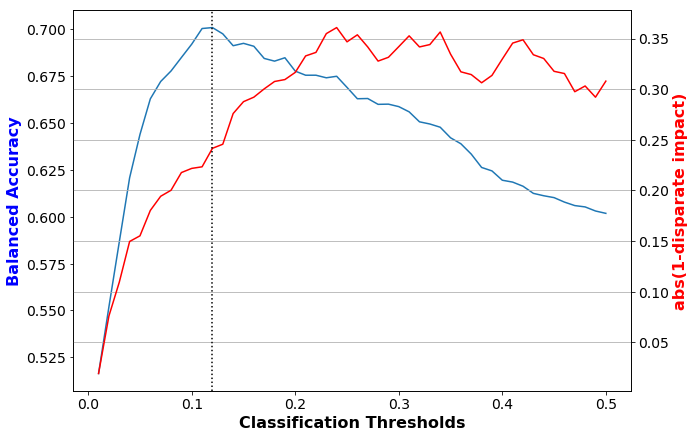

In [38]:
#Plot balanced accuracy, abs(1-disparate impact)

fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(thresh_arr, bal_acc_arr)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(thresh_arr, np.abs(1.0-np.array(disp_imp_arr)), color='r')
ax2.set_ylabel('abs(1-disparate impact)', color='r', fontsize=16, fontweight='bold')

ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind], 
            color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)


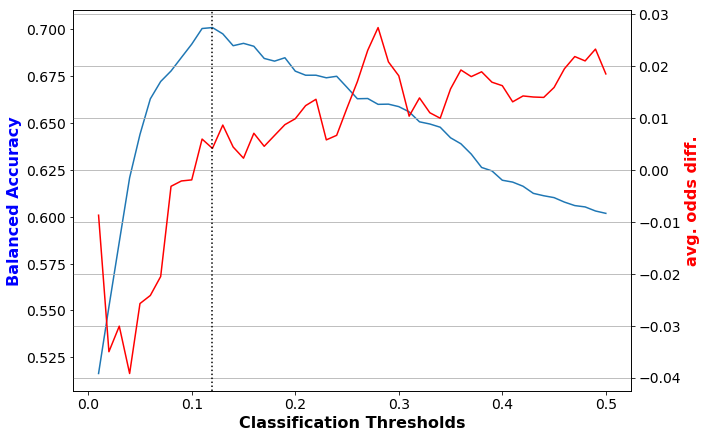

In [39]:
#Plot average odds difference
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(thresh_arr, bal_acc_arr)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(thresh_arr, avg_odds_diff_arr, color='r')
ax2.set_ylabel('avg. odds diff.', color='r', fontsize=16, fontweight='bold')

ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind], color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

In [40]:
ks_thresh_arr_orig_panel19_best = thresh_arr_best
print("Threshold corresponding to Best balanced accuracy: %6.4f" % ks_thresh_arr_orig_panel19_best)
ks_best_bal_acc_arr_orig_panel19 = best_bal_acc
print("Best balanced accuracy: %6.4f" % ks_best_bal_acc_arr_orig_panel19)
ks_disp_imp_at_best_bal_acc_orig_panel19 = disp_imp_at_best_bal_acc
print("Corresponding abs(1-disparate impact) value: %6.4f" % ks_disp_imp_at_best_bal_acc_orig_panel19)
ks_avg_odds_diff_at_best_bal_acc_orig_panel19 = avg_odds_diff_at_best_bal_acc
print("Corresponding average odds difference value: %6.4f" % ks_avg_odds_diff_at_best_bal_acc_orig_panel19)

ks_stat_par_diff_at_best_bal_acc_orig_panel19 = stat_par_diff_at_best_bal_acc
print("Corresponding statistical parity difference value: %6.4f" % ks_stat_par_diff_at_best_bal_acc_orig_panel19)
ks_eq_opp_diff_at_best_bal_acc_orig_panel19 = eq_opp_diff_at_best_bal_acc
print("Corresponding equal opportunity difference value: %6.4f" % ks_eq_opp_diff_at_best_bal_acc_orig_panel19)
ks_theil_ind_at_best_bal_acc_orig_panel19 = theil_ind_at_best_bal_acc
print("Corresponding Theil index value: %6.4f" % ks_theil_ind_at_best_bal_acc_orig_panel19)

Threshold corresponding to Best balanced accuracy: 0.1200
Best balanced accuracy: 0.7009
Corresponding abs(1-disparate impact) value: 0.2416
Corresponding average odds difference value: 0.0041
Corresponding statistical parity difference value: -0.0898
Corresponding equal opportunity difference value: 0.0660
Corresponding Theil index value: 0.1071


<a id="ks-test"></a>

#### 3.4.3. Testing PR model

In [41]:
#Test model on given dataset and find threshold for best balanced accuracy
import numpy as np
from tqdm import tqdm
thresh_arr = np.linspace(0.01, 0.75, 75)

dataset = dataset_orig_panel19_test        #data to test on
scale = ks_scale_orig_panel19
model = ks_orig_panel19

thresh_arr = ks_thresh_arr_orig_panel19_best

te_dataset= dataset.copy(deepcopy=True)
te_dataset.features = scale.transform(te_dataset.features)
pred_dataset = model.predict(te_dataset)

y_data_pred_prob = pred_dataset.scores


y_data_pred = (y_data_pred_prob[:,1] > thresh_arr).astype(np.double)

dataset_pred = dataset.copy()
dataset_pred.labels = y_data_pred

classified_metric = ClassificationMetric(dataset, 
                                            dataset_pred,
                                            unprivileged_groups=unprivileged_groups,
                                            privileged_groups=privileged_groups)
metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                            unprivileged_groups=unprivileged_groups,
                                            privileged_groups=privileged_groups)
    
bal_acc = 0.5*(classified_metric.true_positive_rate() + classified_metric.true_negative_rate())
    
acc = accuracy_score(y_true=dataset.labels,
                    y_pred=dataset_pred.labels)

best_bal_acc = bal_acc
disp_imp_at_best_bal_acc = np.abs(1.0-metric_pred.disparate_impact())

avg_odds_diff_at_best_bal_acc = classified_metric.average_odds_difference()

stat_par_diff_at_best_bal_acc = classified_metric.statistical_parity_difference()
eq_opp_diff_at_best_bal_acc = classified_metric.equal_opportunity_difference()
theil_ind_at_best_bal_acc = classified_metric.theil_index()

In [42]:
ks_thresh_arr_orig_panel19_best_test = thresh_arr_best
print("Threshold corresponding to Best balanced accuracy: %6.4f" % ks_thresh_arr_orig_panel19_best_test)
ks_best_bal_acc_arr_orig_panel19_best_test = best_bal_acc
print("Best balanced accuracy: %6.4f" % ks_best_bal_acc_arr_orig_panel19_best_test)
ks_disp_imp_at_best_bal_acc_orig_panel19_best_test = disp_imp_at_best_bal_acc
print("Corresponding abs(1-disparate impact) value: %6.4f" % ks_disp_imp_at_best_bal_acc_orig_panel19_best_test)
ks_avg_odds_diff_at_best_bal_acc_orig_panel19_best_test = avg_odds_diff_at_best_bal_acc
print("Corresponding average odds difference value: %6.4f" % ks_avg_odds_diff_at_best_bal_acc_orig_panel19_best_test)

ks_stat_par_diff_at_best_bal_acc_orig_panel19_best_test = stat_par_diff_at_best_bal_acc
print("Corresponding statistical parity difference value: %6.4f" % ks_stat_par_diff_at_best_bal_acc_orig_panel19_best_test)
ks_eq_opp_diff_at_best_bal_acc_orig_panel19_best_test = eq_opp_diff_at_best_bal_acc
print("Corresponding equal opportunity difference value: %6.4f" % ks_eq_opp_diff_at_best_bal_acc_orig_panel19_best_test)
ks_theil_ind_at_best_bal_acc_orig_panel19_best_test = theil_ind_at_best_bal_acc
print("Corresponding Theil index value: %6.4f" % ks_theil_ind_at_best_bal_acc_orig_panel19_best_test)

Threshold corresponding to Best balanced accuracy: 0.1200
Best balanced accuracy: 0.7087
Corresponding abs(1-disparate impact) value: 0.1952
Corresponding average odds difference value: 0.0157
Corresponding statistical parity difference value: -0.0720
Corresponding equal opportunity difference value: 0.0698
Corresponding Theil index value: 0.1064


As in the case of re-weighing, prejudice remover has resulted in a fair model. However, it hs come at an expense of relative lower balanced accuracy.

<a id="disparate-impact"></a>

### 3.5. Bias mitigation using pre-processing technique - Disparate Impact (DIR) Remover

[Back to TOC](#toc)<br>

<a id="di-train"></a>

#### 3.5.1. Training DIR model

In [43]:
#Train model on given dataset

dataset = dataset_orig_panel19_train  # data to train on

tr_dataset = dataset.copy(deepcopy=True)
scale = MinMaxScaler().fit(tr_dataset.features)   # remember the scale

tr_dataset.features = scale.transform(tr_dataset.features)
index = tr_dataset.feature_names.index(sens_attr)        

di = DisparateImpactRemover(repair_level=1.0)
train_repd = di.fit_transform(tr_dataset) #repair training dataset

X_tr = np.delete(train_repd.features, index, axis=1)
    

y_tr = train_repd.labels.ravel()
    
model = LogisticRegression(random_state = 1, class_weight='balanced')
model.fit(X_tr, y_tr)

di_scale_orig_panel19 = scale
di_orig_panel19 = model

<a id="di-validate"></a>

#### 3.5.2. Validating DIR model

In [44]:
#validate model on given dataset and find threshold for best balanced accuracy
import numpy as np
from tqdm import tqdm

scale = di_scale_orig_panel19
model = di_orig_panel19

thresh_arr = np.linspace(0.01, 0.75, 75)

dataset = dataset_orig_panel19_validate        #data to validate on

te_dataset= dataset.copy(deepcopy=True)
te_dataset.features = scale.transform(te_dataset.features)

validate_repd = di.fit_transform(te_dataset)  #repair validate dataset

X_te = np.delete(validate_repd.features, index, axis=1)
    

y_te_pred_prob = model.predict_proba(X_te)


bal_acc_arr = []
disp_imp_arr = []
avg_odds_diff_arr = []
stat_par_diff = []
eq_opp_diff = []
theil_ind = []
    
for thresh in tqdm(thresh_arr):
    y_te_pred = (y_te_pred_prob[:,1] > thresh).astype(np.double)

    validate_repd_pred = validate_repd.copy()
    validate_repd_pred.labels = y_te_pred

    classified_metric = ClassificationMetric(validate_repd, 
                                                 validate_repd_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    metric_pred = BinaryLabelDatasetMetric(validate_repd_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    
    bal_acc = 0.5*(classified_metric.true_positive_rate() + classified_metric.true_negative_rate())
    
    acc = accuracy_score(y_true=validate_repd.labels,
                            y_pred=validate_repd_pred.labels)
    bal_acc_arr.append(bal_acc)
    avg_odds_diff_arr.append(classified_metric.average_odds_difference())
    disp_imp_arr.append(metric_pred.disparate_impact())
    stat_par_diff.append(classified_metric.statistical_parity_difference())
    eq_opp_diff.append(classified_metric.equal_opportunity_difference())
    theil_ind.append(classified_metric.theil_index())
    
thresh_arr_best_ind = np.where(bal_acc_arr == np.max(bal_acc_arr))[0][0]
thresh_arr_best = np.array(thresh_arr)[thresh_arr_best_ind]

best_bal_acc = bal_acc_arr[thresh_arr_best_ind]
disp_imp_at_best_bal_acc = np.abs(1.0-np.array(disp_imp_arr))[thresh_arr_best_ind]

avg_odds_diff_at_best_bal_acc = avg_odds_diff_arr[thresh_arr_best_ind]

stat_par_diff_at_best_bal_acc = stat_par_diff[thresh_arr_best_ind]
eq_opp_diff_at_best_bal_acc = eq_opp_diff[thresh_arr_best_ind]
theil_ind_at_best_bal_acc = theil_ind[thresh_arr_best_ind]

100%|█████████████████████████████████████████| 75/75 [00:00<00:00, 142.04it/s]


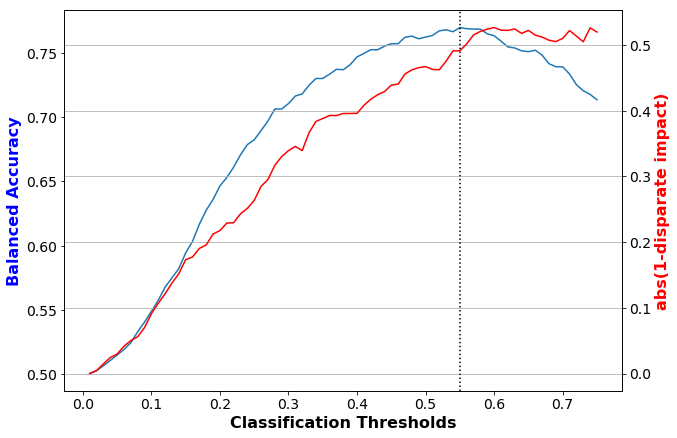

In [45]:
#Plot balanced accuracy, abs(1-disparate impact)

fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(thresh_arr, bal_acc_arr)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(thresh_arr, np.abs(1.0-np.array(disp_imp_arr)), color='r')
ax2.set_ylabel('abs(1-disparate impact)', color='r', fontsize=16, fontweight='bold')

ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind], 
            color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)


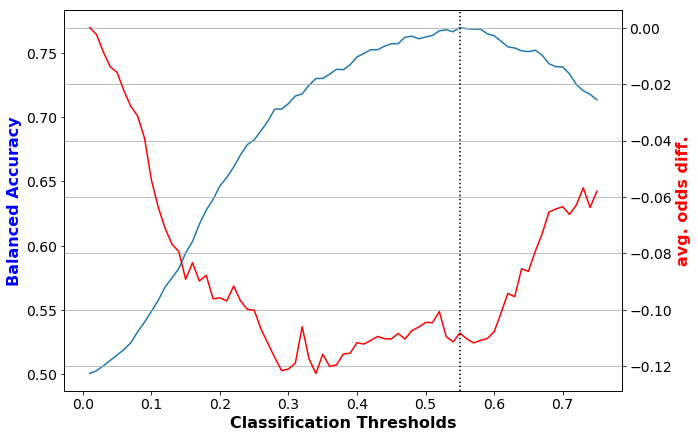

In [46]:
#Plot average odds difference
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(thresh_arr, bal_acc_arr)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(thresh_arr, avg_odds_diff_arr, color='r')
ax2.set_ylabel('avg. odds diff.', color='r', fontsize=16, fontweight='bold')

ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind], color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

In [47]:
di_thresh_arr_orig_panel19_best = thresh_arr_best
print("Threshold corresponding to Best balanced accuracy: %6.4f" % di_thresh_arr_orig_panel19_best)
di_best_bal_acc_arr_orig_panel19 = best_bal_acc
print("Best balanced accuracy: %6.4f" % di_best_bal_acc_arr_orig_panel19)
di_disp_imp_at_best_bal_acc_orig_panel19 = disp_imp_at_best_bal_acc
print("Corresponding abs(1-disparate impact) value: %6.4f" % di_disp_imp_at_best_bal_acc_orig_panel19)
di_avg_odds_diff_at_best_bal_acc_orig_panel19 = avg_odds_diff_at_best_bal_acc
print("Corresponding average odds difference value: %6.4f" % di_avg_odds_diff_at_best_bal_acc_orig_panel19)

di_stat_par_diff_at_best_bal_acc_orig_panel19 = stat_par_diff_at_best_bal_acc
print("Corresponding statistical parity difference value: %6.4f" % di_stat_par_diff_at_best_bal_acc_orig_panel19)
di_eq_opp_diff_at_best_bal_acc_orig_panel19 = eq_opp_diff_at_best_bal_acc
print("Corresponding equal opportunity difference value: %6.4f" % di_eq_opp_diff_at_best_bal_acc_orig_panel19)
di_theil_ind_at_best_bal_acc_orig_panel19 = theil_ind_at_best_bal_acc
print("Corresponding Theil index value: %6.4f" % di_theil_ind_at_best_bal_acc_orig_panel19)

Threshold corresponding to Best balanced accuracy: 0.5500
Best balanced accuracy: 0.7696
Corresponding abs(1-disparate impact) value: 0.4911
Corresponding average odds difference value: -0.1083
Corresponding statistical parity difference value: -0.1881
Corresponding equal opportunity difference value: -0.0944
Corresponding Theil index value: 0.0916


<a id="di-test"></a>

#### 3.5.3. Testing DIR model

In [48]:
#Test model on given dataset and find threshold for best balanced accuracy
import numpy as np
from tqdm import tqdm
thresh_arr = np.linspace(0.01, 0.75, 75)

dataset = dataset_orig_panel19_test        #data to test on
scale = di_scale_orig_panel19
model = di_orig_panel19

te_dataset= dataset.copy(deepcopy=True)
te_dataset.features = scale.transform(te_dataset.features)

di = DisparateImpactRemover(repair_level=1.0)

test_repd = di.fit_transform(te_dataset)  #repair test dataset

index = te_dataset.feature_names.index(sens_attr)        
X_te = np.delete(test_repd.features, index, axis=1)
    

y_te_pred_prob = model.predict_proba(X_te)

thresh_arr = di_thresh_arr_orig_panel19_best    

y_te_pred = (y_te_pred_prob[:,1] > thresh).astype(np.double)

test_repd_pred = test_repd.copy()
test_repd_pred.labels = y_te_pred

classified_metric = ClassificationMetric(test_repd, 
                                             test_repd_pred,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
metric_pred = BinaryLabelDatasetMetric(test_repd_pred,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
    
bal_acc = 0.5*(classified_metric.true_positive_rate() + classified_metric.true_negative_rate())
    
acc = accuracy_score(y_true=test_repd.labels,
                        y_pred=test_repd_pred.labels)

best_bal_acc = bal_acc
disp_imp_at_best_bal_acc = np.abs(1.0-metric_pred.disparate_impact())

avg_odds_diff_at_best_bal_acc = classified_metric.average_odds_difference()

stat_par_diff_at_best_bal_acc = classified_metric.statistical_parity_difference()
eq_opp_diff_at_best_bal_acc = classified_metric.equal_opportunity_difference()
theil_ind_at_best_bal_acc = classified_metric.theil_index()

In [49]:
di_thresh_arr_orig_panel19_best_test = thresh_arr_best
print("Threshold corresponding to Best balanced accuracy: %6.4f" % di_thresh_arr_orig_panel19_best_test)
di_best_bal_acc_arr_orig_panel19_best_test = best_bal_acc
print("Best balanced accuracy: %6.4f" % di_best_bal_acc_arr_orig_panel19_best_test)
di_disp_imp_at_best_bal_acc_orig_panel19_best_test = disp_imp_at_best_bal_acc
print("Corresponding abs(1-disparate impact) value: %6.4f" % di_disp_imp_at_best_bal_acc_orig_panel19_best_test)
di_avg_odds_diff_at_best_bal_acc_orig_panel19_best_test = avg_odds_diff_at_best_bal_acc
print("Corresponding average odds difference value: %6.4f" % di_avg_odds_diff_at_best_bal_acc_orig_panel19_best_test)

di_stat_par_diff_at_best_bal_acc_orig_panel19_best_test = stat_par_diff_at_best_bal_acc
print("Corresponding statistical parity difference value: %6.4f" % di_stat_par_diff_at_best_bal_acc_orig_panel19_best_test)
di_eq_opp_diff_at_best_bal_acc_orig_panel19_best_test = eq_opp_diff_at_best_bal_acc
print("Corresponding equal opportunity difference value: %6.4f" % di_eq_opp_diff_at_best_bal_acc_orig_panel19_best_test)
di_theil_ind_at_best_bal_acc_orig_panel19_best_test = theil_ind_at_best_bal_acc
print("Corresponding Theil index value: %6.4f" % di_theil_ind_at_best_bal_acc_orig_panel19_best_test)

Threshold corresponding to Best balanced accuracy: 0.5500
Best balanced accuracy: 0.7233
Corresponding abs(1-disparate impact) value: 0.5133
Corresponding average odds difference value: -0.0898
Corresponding statistical parity difference value: -0.1213
Corresponding equal opportunity difference value: -0.1282
Corresponding Theil index value: 0.1126


While disparate impact remover resulted in a model that is relatively fairer than, for examaple, the logistic regression model learnt from original data, it is quite unfair with an bs(1-disparate impact) value much higher than the typically desired value of < 0.2

<a id="summary-2015-learning"></a>

### 3.6. Summary of Model Learning Results

[Back to TOC](#toc)<br>

Logistic Regression classifier 'without' bias mitigation

In [50]:
print("Threshold corresponding to Best balanced accuracy: %6.4f" % lr_thresh_arr_orig_panel19_best_test)
print("Best balanced accuracy: %6.4f" % lr_best_bal_acc_arr_orig_panel19_best_test)
print("Corresponding abs(1-disparate impact) value: %6.4f" % lr_disp_imp_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding average odds difference value: %6.4f" % lr_avg_odds_diff_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding statistical parity difference value: %6.4f" % lr_stat_par_diff_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding equal opportunity difference value: %6.4f" % lr_eq_opp_diff_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding Theil index value: %6.4f" % lr_theil_ind_at_best_bal_acc_orig_panel19_best_test)

Threshold corresponding to Best balanced accuracy: 0.1900
Best balanced accuracy: 0.7759
Corresponding abs(1-disparate impact) value: 0.5738
Corresponding average odds difference value: -0.2057
Corresponding statistical parity difference value: -0.2612
Corresponding equal opportunity difference value: -0.2228
Corresponding Theil index value: 0.0921


Random Forest classifier 'without' bias mitigation

In [51]:
print("Threshold corresponding to Best balanced accuracy: %6.4f" % rf_thresh_arr_orig_panel19_best_test)
print("Best balanced accuracy: %6.4f" % rf_best_bal_acc_arr_orig_panel19_best_test)
print("Corresponding abs(1-disparate impact) value: %6.4f" % rf_disp_imp_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding average odds difference value: %6.4f" % rf_avg_odds_diff_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding statistical parity difference value: %6.4f" % rf_stat_par_diff_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding equal opportunity difference value: %6.4f" % rf_eq_opp_diff_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding Theil index value: %6.4f" % rf_theil_ind_at_best_bal_acc_orig_panel19_best_test)

Threshold corresponding to Best balanced accuracy: 0.2200
Best balanced accuracy: 0.7682
Corresponding abs(1-disparate impact) value: 0.5021
Corresponding average odds difference value: -0.1409
Corresponding statistical parity difference value: -0.2182
Corresponding equal opportunity difference value: -0.1222
Corresponding Theil index value: 0.0933


Logistic Regression classifier 'with' bias mitigation

In [52]:
print("Threshold corresponding to Best balanced accuracy: %6.4f" % lr_thresh_arr_transf_panel19_best_test)
print("Best balanced accuracy: %6.4f" % lr_best_bal_acc_arr_transf_panel19_best_test)
print("Corresponding abs(1-disparate impact) value: %6.4f" % lr_disp_imp_at_best_bal_acc_transf_panel19_best_test)
print("Corresponding average odds difference value: %6.4f" % lr_avg_odds_diff_at_best_bal_acc_transf_panel19_best_test)
print("Corresponding statistical parity difference value: %6.4f" % lr_stat_par_diff_at_best_bal_acc_transf_panel19_best_test)
print("Corresponding equal opportunity difference value: %6.4f" % lr_eq_opp_diff_at_best_bal_acc_transf_panel19_best_test)
print("Corresponding Theil index value: %6.4f" % lr_theil_ind_at_best_bal_acc_transf_panel19_best_test)

Threshold corresponding to Best balanced accuracy: 0.2200
Best balanced accuracy: 0.7539
Corresponding abs(1-disparate impact) value: 0.2482
Corresponding average odds difference value: -0.0151
Corresponding statistical parity difference value: -0.0872
Corresponding equal opportunity difference value: -0.0035
Corresponding Theil index value: 0.0966


Random Forest classifier 'with' bias mitigation

In [53]:
print("Threshold corresponding to Best balanced accuracy: %6.4f" % rf_thresh_arr_transf_panel19_best_test)
print("Best balanced accuracy: %6.4f" % rf_best_bal_acc_arr_transf_panel19_best_test)
print("Corresponding abs(1-disparate impact) value: %6.4f" % rf_disp_imp_at_best_bal_acc_transf_panel19_best_test)
print("Corresponding average odds difference value: %6.4f" % rf_avg_odds_diff_at_best_bal_acc_transf_panel19_best_test)
print("Corresponding statistical parity difference value: %6.4f" % rf_stat_par_diff_at_best_bal_acc_transf_panel19_best_test)
print("Corresponding equal opportunity difference value: %6.4f" % rf_eq_opp_diff_at_best_bal_acc_transf_panel19_best_test)
print("Corresponding Theil index value: %6.4f" % rf_theil_ind_at_best_bal_acc_transf_panel19_best_test)

Threshold corresponding to Best balanced accuracy: 0.2400
Best balanced accuracy: 0.7573
Corresponding abs(1-disparate impact) value: 0.4361
Corresponding average odds difference value: -0.0942
Corresponding statistical parity difference value: -0.1713
Corresponding equal opportunity difference value: -0.0730
Corresponding Theil index value: 0.0965


Model learnt using in-processing Bias Mitigation (Kamishima)

In [54]:
print("Threshold corresponding to Best balanced accuracy: %6.4f" % ks_thresh_arr_orig_panel19_best_test)
print("Best balanced accuracy: %6.4f" % ks_best_bal_acc_arr_orig_panel19_best_test)
print("Corresponding abs(1-disparate impact) value: %6.4f" % ks_disp_imp_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding average odds difference value: %6.4f" % ks_avg_odds_diff_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding statistical parity difference value: %6.4f" % ks_stat_par_diff_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding equal opportunity difference value: %6.4f" % ks_eq_opp_diff_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding Theil index value: %6.4f" % ks_theil_ind_at_best_bal_acc_orig_panel19_best_test)

Threshold corresponding to Best balanced accuracy: 0.1200
Best balanced accuracy: 0.7087
Corresponding abs(1-disparate impact) value: 0.1952
Corresponding average odds difference value: 0.0157
Corresponding statistical parity difference value: -0.0720
Corresponding equal opportunity difference value: 0.0698
Corresponding Theil index value: 0.1064


Model learnt using Disparate Impact Remover

In [55]:
print("Threshold corresponding to Best balanced accuracy: %6.4f" % di_thresh_arr_orig_panel19_best_test)
print("Best balanced accuracy: %6.4f" % di_best_bal_acc_arr_orig_panel19_best_test)
print("Corresponding abs(1-disparate impact) value: %6.4f" % di_disp_imp_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding average odds difference value: %6.4f" % di_avg_odds_diff_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding statistical parity difference value: %6.4f" % di_stat_par_diff_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding equal opportunity difference value: %6.4f" % di_eq_opp_diff_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding Theil index value: %6.4f" % di_theil_ind_at_best_bal_acc_orig_panel19_best_test)

Threshold corresponding to Best balanced accuracy: 0.5500
Best balanced accuracy: 0.7233
Corresponding abs(1-disparate impact) value: 0.5133
Corresponding average odds difference value: -0.0898
Corresponding statistical parity difference value: -0.1213
Corresponding equal opportunity difference value: -0.1282
Corresponding Theil index value: 0.1126


Of all the models, the logistic regression model gives the best balance in terms of balanced accuracy and fairness. While the model learnt by prejudice remover is slightly fairer, it has much lower accuracy. All other models are quite unfair compared to the logistic model. Hence, we take the logistic regression model learnt from data transformed by re-weighing and 'deploy' it.

<a id="deployment-2015-2015"></a>

## 4. Deploying model

[Back to TOC](#toc)<br>

<a id="deployment-2015"></a>

### 4.1. Testing learned model on 2015 Panel 20 deployment data

[Back to TOC](#toc)<br>

In [56]:
np.random.seed(seed)
dataset_orig_panel20 = MEPSDataset20()
dataset_orig_panel20_train, dataset_orig_panel20_validate, dataset_orig_panel20_deploy \
                                                = dataset_orig_panel20.split([split_1,split_2], shuffle=shuffle) 

#now align them with the 2014 datasets
dataset_orig_panel20_train = dataset_orig_panel19_train.align_datasets(dataset_orig_panel20_train)
dataset_orig_panel20_validate = dataset_orig_panel19_train.align_datasets(dataset_orig_panel20_validate)
dataset_orig_panel20_deploy = dataset_orig_panel19_train.align_datasets(dataset_orig_panel20_deploy)

In [57]:
# print out some labels, names, etc.
display(Markdown("#### Training Dataset shape"))
print(dataset_orig_panel20_train.features.shape)
display(Markdown("#### Validation Dataset shape"))
print(dataset_orig_panel20_validate.features.shape)
display(Markdown("#### Deployment Dataset shape"))
print(dataset_orig_panel20_deploy.features.shape)
display(Markdown("#### Favorable and unfavorable labels"))
print(dataset_orig_panel20_train.favorable_label, dataset_orig_panel20_train.unfavorable_label)
display(Markdown("#### Protected attribute names"))
print(dataset_orig_panel20_train.protected_attribute_names)
display(Markdown("#### Privileged and unprivileged protected attribute values"))
print(dataset_orig_panel20_train.privileged_protected_attributes, 
      dataset_orig_panel20_train.unprivileged_protected_attributes)
display(Markdown("#### Dataset feature names"))
print(dataset_orig_panel20_train.feature_names)

#### Training Dataset shape

(8785, 138)


#### Validation Dataset shape

(5271, 138)


#### Deployment Dataset shape

(3514, 138)


#### Favorable and unfavorable labels

1.0 0.0


#### Protected attribute names

['RACE']


#### Privileged and unprivileged protected attribute values

[array([1.])] [array([0.])]


#### Dataset feature names

['RACE', 'AGE', 'PCS42', 'K6SUM42', 'MCS42', 'REGION=1', 'REGION=2', 'REGION=3', 'REGION=4', 'SEX=1', 'SEX=2', 'MARRY=1', 'MARRY=2', 'MARRY=3', 'MARRY=4', 'MARRY=5', 'MARRY=6', 'MARRY=7', 'MARRY=8', 'MARRY=9', 'MARRY=10', 'FTSTU=-1', 'FTSTU=1', 'FTSTU=2', 'FTSTU=3', 'ACTDTY=1', 'ACTDTY=2', 'ACTDTY=3', 'ACTDTY=4', 'HONRDC=1', 'HONRDC=2', 'HONRDC=3', 'HONRDC=4', 'RTHLTH=-1', 'RTHLTH=1', 'RTHLTH=2', 'RTHLTH=3', 'RTHLTH=4', 'RTHLTH=5', 'MNHLTH=-1', 'MNHLTH=1', 'MNHLTH=2', 'MNHLTH=3', 'MNHLTH=4', 'MNHLTH=5', 'HIBPDX=-1', 'HIBPDX=1', 'HIBPDX=2', 'CHDDX=-1', 'CHDDX=1', 'CHDDX=2', 'ANGIDX=-1', 'ANGIDX=1', 'ANGIDX=2', 'MIDX=-1', 'MIDX=1', 'MIDX=2', 'OHRTDX=-1', 'OHRTDX=1', 'OHRTDX=2', 'STRKDX=-1', 'STRKDX=1', 'STRKDX=2', 'EMPHDX=-1', 'EMPHDX=1', 'EMPHDX=2', 'CHBRON=-1', 'CHBRON=1', 'CHBRON=2', 'CHOLDX=-1', 'CHOLDX=1', 'CHOLDX=2', 'CANCERDX=-1', 'CANCERDX=1', 'CANCERDX=2', 'DIABDX=-1', 'DIABDX=1', 'DIABDX=2', 'JTPAIN=-1', 'JTPAIN=1', 'JTPAIN=2', 'ARTHDX=-1', 'ARTHDX=1', 'ARTHDX=2', 'ARTHTYPE=-1'

In [58]:
# Metric for the original dataset
sens_idx = dataset_orig_panel20_deploy.protected_attribute_names.index(sens_attr)
privileged_groups =  [{sens_attr:dataset_orig_panel20_deploy.privileged_protected_attributes[sens_idx][0]}]
unprivileged_groups = [{sens_attr:dataset_orig_panel20_deploy.unprivileged_protected_attributes[sens_idx][0]}]
metric_orig_panel20_deploy = BinaryLabelDatasetMetric(dataset_orig_panel20_deploy, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between privileged and unprivileged groups = %f" % \
                                                  metric_orig_panel20_deploy.mean_difference())

#### Original training dataset

Difference in mean outcomes between privileged and unprivileged groups = -0.135347


In [59]:
#Evaluate performance of a given model with a given threshold on a given dataset

scale = lr_scale_transf_panel19

dataset = dataset_orig_panel20_deploy    #apply model to this data
model = lr_transf_panel19               #this is the model applied
                                   #lr_transf_panel19 is LR model learned from Panel panel19 (panel1914)
                                   #transformed data
thresh_arr = lr_thresh_arr_transf_panel19_best  # lr_thresh_arr_transf_panel19_best wass threshold for LR
                                            # model with highest balanced accuracy

X_data = scale.transform(dataset.features)
y_data = dataset.labels.ravel()
y_data_pred_prob = model.predict_proba(X_data)  

    
y_pred = (y_data_pred_prob[:,1] > thresh_arr).astype(np.double)

dataset_pred = dataset.copy()
dataset_pred.labels = y_pred

classified_metric = ClassificationMetric(dataset, 
                                        dataset_pred,
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)
metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)
    
TPR = classified_metric.true_positive_rate()
TNR = classified_metric.true_negative_rate()
bal_acc = 0.5*(TPR+TNR)
acc = accuracy_score(y_true=dataset.labels,
                    y_pred=dataset_pred.labels)

#get results
best_bal_acc = bal_acc
avg_odds_diff_at_best_bal_acc = classified_metric.average_odds_difference()
disp_imp_at_best_bal_acc = np.abs(1.0 - metric_pred.disparate_impact())
stat_par_diff_at_best_bal_acc = classified_metric.statistical_parity_difference()
eq_opp_diff_at_best_bal_acc = classified_metric.equal_opportunity_difference()
theil_ind_at_best_bal_acc = classified_metric.theil_index()

In [60]:
lr_best_bal_acc_arr_transf_panel19_deploy_panel20 = best_bal_acc
print("Best balanced accuracy: %6.4f" % lr_best_bal_acc_arr_transf_panel19_deploy_panel20)
lr_disp_imp_at_best_bal_acc_transf_panel19_deploy_panel20 = disp_imp_at_best_bal_acc
print("Corresponding abs(1-disparate impact) value: %6.4f" % lr_disp_imp_at_best_bal_acc_transf_panel19_deploy_panel20)
lr_avg_odds_diff_at_best_bal_acc_transf_panel19_deploy_panel20 = avg_odds_diff_at_best_bal_acc
print("Corresponding average odds difference value: %6.4f" % lr_avg_odds_diff_at_best_bal_acc_transf_panel19_deploy_panel20)

lr_stat_par_diff_at_best_bal_acc_transf_panel19_deploy_panel20 = stat_par_diff_at_best_bal_acc
print("Corresponding statistical parity difference value: %6.4f" % lr_stat_par_diff_at_best_bal_acc_transf_panel19_deploy_panel20)
lr_eq_opp_diff_at_best_bal_acc_transf_panel19_deploy_panel20 = eq_opp_diff_at_best_bal_acc
print("Corresponding equal opportunity difference value: %6.4f" % lr_eq_opp_diff_at_best_bal_acc_transf_panel19_deploy_panel20)
lr_theil_ind_at_best_bal_acc_transf_panel19_deploy_panel20 = theil_ind_at_best_bal_acc
print("Corresponding Theil index value: %6.4f" % lr_theil_ind_at_best_bal_acc_transf_panel19_deploy_panel20)

Best balanced accuracy: 0.7289
Corresponding abs(1-disparate impact) value: 0.1106
Corresponding average odds difference value: 0.0696
Corresponding statistical parity difference value: -0.0341
Corresponding equal opportunity difference value: 0.1315
Corresponding Theil index value: 0.1038


Deployed model tested on the 2015 Panel 20 data still exhibits fairness as well as maintains accuracy.

<a id="lime"></a>

### 4.2. Generating explanations for model predictions on 2015 Panel 20 deployment data using LIME

[Back to TOC](#toc)<br>

This section shows how LIME can be integrated with AIF 360 to get explanations for model predictions.

In [61]:
scale = lr_scale_transf_panel19

train_dataset = dataset_transf_panel19_train  #data the deployed model (lr from transformed data)
test_dataset = dataset_orig_panel20_deploy    #the data model i sbeing tested on
model = lr_transf_panel19               #this is the model applied
                                   #lr_transf_panel19 is LR model learned from Panel panel19 (panel1914)
                                   #transformed data
thresh_arr = lr_thresh_arr_transf_panel19_best  # lr_thresh_arr_transf_panel19_best wass threshold for LR

#First, you call LimeEncode.fit(..) to fit the encoder to the aiflearn dataset. 
limeData = LimeEncoder().fit(train_dataset)

#The 'transform' method then is used to convert aiflearn features to lime compatible features. 
s_train = limeData.transform(train_dataset.features)
s_test = limeData.transform(test_dataset.features)


#The LimeTabularExplainer takes as input the lime compatible data along with various other arguments to create a lime explainer
explainer = lime.lime_tabular.LimeTabularExplainer(s_train ,class_names=limeData.s_class_names, 
                                                   feature_names = limeData.s_feature_names,
                                                   categorical_features=limeData.s_categorical_features, 
                                                   categorical_names=limeData.s_categorical_names, 
                                                   kernel_width=3, verbose=False,discretize_continuous=True)

#The inverse_transform function is used to transform lime compatible data back to aiflearn compatible data since that is needed
# by the model to make predictions. The function below is used to produce 
#the predictions for any perturbed data that is produce by lime
s_predict_fn = lambda x: model.predict_proba(scale.transform(limeData.inverse_transform(x)))

#the explain_instance method can then be used to produce explanations for any instance in the test dataset
print("Threshold corresponding to Best balanced accuracy: %6.4f" % thresh_arr)
i = 0
exp = explainer.explain_instance(s_test[i], s_predict_fn, num_features=10)
exp.show_in_notebook(show_all=False)
print("Actual label: " + str(test_dataset.labels[i]))

i = 2
exp = explainer.explain_instance(s_test[i], s_predict_fn, num_features=10)
exp.show_in_notebook(show_all=False)
print("Actual label: " + str(test_dataset.labels[i]))


Threshold corresponding to Best balanced accuracy: 0.2200


Actual label: [0.]


Actual label: [0.]


See [LIME documentation](https://github.com/marcotcr/lime) for detailed description of results. In short, the left hand side shows the label predictions made by the model, the middle shows the features that are important to the instance in question and their contributions (weights) to the label prediction, while the right hand side shows the actual values of the features in the particular instance.

<a id="deployment-2016"></a>

### 4.3. Testing learned model on 2016 Panel 21 deployment data

[Back to TOC](#toc)<br>

Load the Panel 21 data, and split it again into 3 parts: train, validate, and deploy. We test the deployed model against the deployment data. If a new model needs to be learnt, it will be learnt from the train/validate data and then tested again on the deployment data.

In [62]:
np.random.seed(seed)
dataset_orig_panel21 = MEPSDataset21()
dataset_orig_panel21_train, dataset_orig_panel21_validate, dataset_orig_panel21_deploy \
                                = dataset_orig_panel21.split([split_1,split_2], shuffle=shuffle) 

#now align them with the panel19 datasets
dataset_orig_panel21_train = dataset_orig_panel19_train.align_datasets(dataset_orig_panel21_train)
dataset_orig_panel21_validate = dataset_orig_panel19_train.align_datasets(dataset_orig_panel21_validate)
dataset_orig_panel21_deploy = dataset_orig_panel19_train.align_datasets(dataset_orig_panel21_deploy)

In [63]:
# print out some labels, names, etc.
display(Markdown("#### Training Dataset shape"))
print(dataset_orig_panel21_train.features.shape)
display(Markdown("#### Validation Dataset shape"))
print(dataset_orig_panel21_validate.features.shape)
display(Markdown("#### Deployment Dataset shape"))
print(dataset_orig_panel21_deploy.features.shape)
display(Markdown("#### Favorable and unfavorable labels"))
print(dataset_orig_panel21_train.favorable_label, dataset_orig_panel21_train.unfavorable_label)
display(Markdown("#### Protected attribute names"))
print(dataset_orig_panel21_train.protected_attribute_names)
display(Markdown("#### Privileged and unprivileged protected attribute values"))
print(dataset_orig_panel21_train.privileged_protected_attributes, 
      dataset_orig_panel21_train.unprivileged_protected_attributes)
display(Markdown("#### Dataset feature names"))
print(dataset_orig_panel21_train.feature_names)

#### Training Dataset shape

(7837, 138)


#### Validation Dataset shape

(4703, 138)


#### Deployment Dataset shape

(3135, 138)


#### Favorable and unfavorable labels

1.0 0.0


#### Protected attribute names

['RACE']


#### Privileged and unprivileged protected attribute values

[array([1.])] [array([0.])]


#### Dataset feature names

['RACE', 'AGE', 'PCS42', 'K6SUM42', 'MCS42', 'REGION=1', 'REGION=2', 'REGION=3', 'REGION=4', 'SEX=1', 'SEX=2', 'MARRY=1', 'MARRY=2', 'MARRY=3', 'MARRY=4', 'MARRY=5', 'MARRY=6', 'MARRY=7', 'MARRY=8', 'MARRY=9', 'MARRY=10', 'FTSTU=-1', 'FTSTU=1', 'FTSTU=2', 'FTSTU=3', 'ACTDTY=1', 'ACTDTY=2', 'ACTDTY=3', 'ACTDTY=4', 'HONRDC=1', 'HONRDC=2', 'HONRDC=3', 'HONRDC=4', 'RTHLTH=-1', 'RTHLTH=1', 'RTHLTH=2', 'RTHLTH=3', 'RTHLTH=4', 'RTHLTH=5', 'MNHLTH=-1', 'MNHLTH=1', 'MNHLTH=2', 'MNHLTH=3', 'MNHLTH=4', 'MNHLTH=5', 'HIBPDX=-1', 'HIBPDX=1', 'HIBPDX=2', 'CHDDX=-1', 'CHDDX=1', 'CHDDX=2', 'ANGIDX=-1', 'ANGIDX=1', 'ANGIDX=2', 'MIDX=-1', 'MIDX=1', 'MIDX=2', 'OHRTDX=-1', 'OHRTDX=1', 'OHRTDX=2', 'STRKDX=-1', 'STRKDX=1', 'STRKDX=2', 'EMPHDX=-1', 'EMPHDX=1', 'EMPHDX=2', 'CHBRON=-1', 'CHBRON=1', 'CHBRON=2', 'CHOLDX=-1', 'CHOLDX=1', 'CHOLDX=2', 'CANCERDX=-1', 'CANCERDX=1', 'CANCERDX=2', 'DIABDX=-1', 'DIABDX=1', 'DIABDX=2', 'JTPAIN=-1', 'JTPAIN=1', 'JTPAIN=2', 'ARTHDX=-1', 'ARTHDX=1', 'ARTHDX=2', 'ARTHTYPE=-1'

In [64]:
# Metric for the original dataset
sens_idx = dataset_orig_panel21_deploy.protected_attribute_names.index(sens_attr)
privileged_groups =  [{sens_attr:dataset_orig_panel21_deploy.privileged_protected_attributes[sens_idx][0]}]
unprivileged_groups = [{sens_attr:dataset_orig_panel21_deploy.unprivileged_protected_attributes[sens_idx][0]}]
metric_orig_panel21_deploy = BinaryLabelDatasetMetric(dataset_orig_panel21_deploy, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between privileged and unprivileged groups = %f" % \
                                                  metric_orig_panel21_deploy.mean_difference())

#### Original training dataset

Difference in mean outcomes between privileged and unprivileged groups = -0.098749


Now, the logistic regression classifier learnt from the panel 19 data after reweighing is tested against the panel 21 deployment data.

In [65]:
#Evaluate performance of a given model with a given threshold on a given dataset

scale = lr_scale_transf_panel19

dataset = dataset_orig_panel21_deploy    #apply model to this data
model = lr_transf_panel19               #this is the model applied
                                   #lr_transf_panel19 is LR model learned from Panel 19
                                   #transformed data
thresh_arr = lr_thresh_arr_transf_panel19_best  # lr_thresh_arr_transf_panel19_best wass threshold for LR
                                            # model with highest balanced accuracy

X_data = scale.transform(dataset.features)
y_data = dataset.labels.ravel()
y_data_pred_prob = model.predict_proba(X_data)  

    
y_pred = (y_data_pred_prob[:,1] > thresh_arr).astype(np.double)

dataset_pred = dataset.copy()
dataset_pred.labels = y_pred

classified_metric = ClassificationMetric(dataset, 
                                        dataset_pred,
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)
metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)
    
TPR = classified_metric.true_positive_rate()
TNR = classified_metric.true_negative_rate()
bal_acc = 0.5*(TPR+TNR)
acc = accuracy_score(y_true=dataset.labels,
                    y_pred=dataset_pred.labels)

#get results
best_bal_acc = bal_acc
avg_odds_diff_at_best_bal_acc = classified_metric.average_odds_difference()
disp_imp_at_best_bal_acc = np.abs(1.0 - metric_pred.disparate_impact())
stat_par_diff_at_best_bal_acc = classified_metric.statistical_parity_difference()
eq_opp_diff_at_best_bal_acc = classified_metric.equal_opportunity_difference()
theil_ind_at_best_bal_acc = classified_metric.theil_index()

In [66]:
lr_best_bal_acc_arr_transf_panel19_deploy_panel21 = best_bal_acc
print("Best balanced accuracy: %6.4f" % lr_best_bal_acc_arr_transf_panel19_deploy_panel21)
lr_disp_imp_at_best_bal_acc_transf_panel19_deploy_panel21 = disp_imp_at_best_bal_acc
print("Corresponding abs(1-disparate impact) value: %6.4f" % lr_disp_imp_at_best_bal_acc_transf_panel19_deploy_panel21)
lr_avg_odds_diff_at_best_bal_acc_transf_panel19_deploy_panel21 = avg_odds_diff_at_best_bal_acc
print("Corresponding average odds difference value: %6.4f" % lr_avg_odds_diff_at_best_bal_acc_transf_panel19_deploy_panel21)

lr_stat_par_diff_at_best_bal_acc_transf_panel19_deploy_panel21 = stat_par_diff_at_best_bal_acc
print("Corresponding statistical parity difference value: %6.4f" % lr_stat_par_diff_at_best_bal_acc_transf_panel19_deploy_panel21)
lr_eq_opp_diff_at_best_bal_acc_transf_panel19_deploy_panel21 = eq_opp_diff_at_best_bal_acc
print("Corresponding equal opportunity difference value: %6.4f" % lr_eq_opp_diff_at_best_bal_acc_transf_panel19_deploy_panel21)
lr_theil_ind_at_best_bal_acc_transf_panel19_deploy_panel21 = theil_ind_at_best_bal_acc
print("Corresponding Theil index value: %6.4f" % lr_theil_ind_at_best_bal_acc_transf_panel19_deploy_panel21)

Best balanced accuracy: 0.7269
Corresponding abs(1-disparate impact) value: 0.2257
Corresponding average odds difference value: -0.0101
Corresponding statistical parity difference value: -0.0719
Corresponding equal opportunity difference value: 0.0142
Corresponding Theil index value: 0.0967


Compared to the 2015 panel 20 deployment data results, the abs(1 - disparate impact) fairness metric shows a noticable drift upwards. While still within specs, it may be worthwhile to re-learn the model. So even though the model is still relatively fair and accurate, we go ahead and re-learn the model from the 2016 Panel 21 data.

<a id="learning-2016"></a>

## 5. Re-learning model (from 2016 Panel 21 data)

[Back to TOC](#toc)<br>

**Train and evaluate  new model on 'transformed' 2016 training/test data**

In [67]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,
               privileged_groups=privileged_groups)
RW.fit(dataset_orig_panel21_train)
dataset_transf_panel21_train = RW.transform(dataset_orig_panel21_train)

In [68]:
metric_transf_panel21_train = BinaryLabelDatasetMetric(dataset_transf_panel21_train, 
                                         unprivileged_groups=unprivileged_groups,
                                         privileged_groups=privileged_groups)
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between privileged and unprivileged groups = %f" % metric_transf_panel21_train.mean_difference())

#### Transformed training dataset

Difference in mean outcomes between privileged and unprivileged groups = -0.000000


In [69]:
#Train model on given dataset
dataset = dataset_transf_panel21_train  # data to train on

scale = StandardScaler().fit(dataset.features)

model = LogisticRegression(random_state = 1)       # model to learn

X_train = scale.transform(dataset.features)
y_train = dataset.labels.ravel()


model.fit(X_train, y_train,
        sample_weight=dataset.instance_weights)
y_train_pred = model.predict(X_train)

#save model
lr_transf_panel21 = model
scale_transf_panel21 = scale

In [70]:
#validate model on given dataset and find threshold for best balanced accuracy
import numpy as np
from tqdm import tqdm
thresh_arr = np.linspace(0.01, 0.5, 50)

scale = scale_transf_panel21

model = lr_transf_panel21                  #model to validate
dataset = dataset_orig_panel21_validate        #data to validate on

X_validate = scale.transform(dataset.features)
y_validate = dataset.labels.ravel()
y_validate_pred_prob = model.predict_proba(X_validate)


bal_acc_arr = []
disp_imp_arr = []
avg_odds_diff_arr = []
stat_par_diff = []
eq_opp_diff = []
theil_ind = []
    
for thresh in tqdm(thresh_arr):
    y_validate_pred = (y_validate_pred_prob[:,1] > thresh).astype(np.double)

    dataset_pred = dataset.copy()
    dataset_pred.labels = y_validate_pred

    classified_metric = ClassificationMetric(dataset, 
                                                 dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    
    bal_acc = 0.5*(classified_metric.true_positive_rate() + classified_metric.true_negative_rate())
    
    acc = accuracy_score(y_true=dataset.labels,
                            y_pred=dataset_pred.labels)
    bal_acc_arr.append(bal_acc)
    avg_odds_diff_arr.append(classified_metric.average_odds_difference())
    disp_imp_arr.append(metric_pred.disparate_impact())
    stat_par_diff.append(classified_metric.statistical_parity_difference())
    eq_opp_diff.append(classified_metric.equal_opportunity_difference())
    theil_ind.append(classified_metric.theil_index())

    
thresh_arr_best_ind = np.where(bal_acc_arr == np.max(bal_acc_arr))[0][0]
thresh_arr_best = np.array(thresh_arr)[thresh_arr_best_ind]

best_bal_acc = bal_acc_arr[thresh_arr_best_ind]
disp_imp_at_best_bal_acc = np.abs(1.0-np.array(disp_imp_arr))[thresh_arr_best_ind]

avg_odds_diff_at_best_bal_acc = avg_odds_diff_arr[thresh_arr_best_ind]

stat_par_diff_at_best_bal_acc = stat_par_diff[thresh_arr_best_ind]
eq_opp_diff_at_best_bal_acc = eq_opp_diff[thresh_arr_best_ind]
theil_ind_at_best_bal_acc = theil_ind[thresh_arr_best_ind]

100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 176.67it/s]


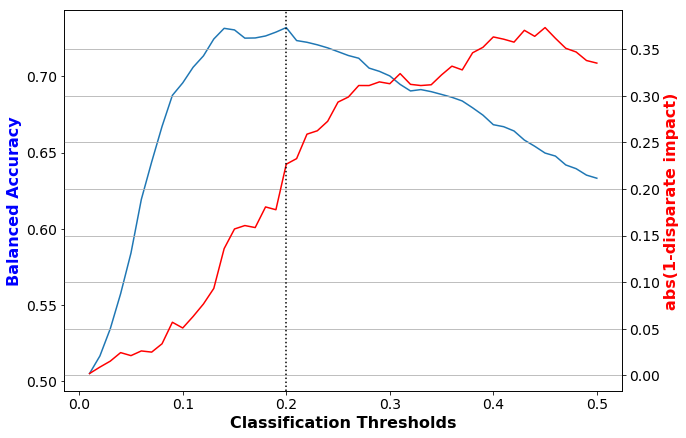

In [71]:
#Plot balanced accuracy, abs(1-disparate impact)

fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(thresh_arr, bal_acc_arr)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(thresh_arr, np.abs(1.0-np.array(disp_imp_arr)), color='r')
ax2.set_ylabel('abs(1-disparate impact)', color='r', fontsize=16, fontweight='bold')

ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind], 
            color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)


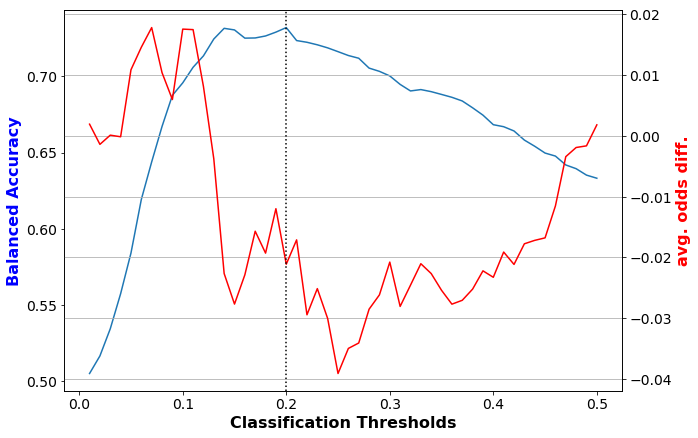

In [72]:
#Plot average odds difference
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(thresh_arr, bal_acc_arr)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(thresh_arr, avg_odds_diff_arr, color='r')
ax2.set_ylabel('avg. odds diff.', color='r', fontsize=16, fontweight='bold')

ax2.axvline(np.array(thresh_arr)[thresh_arr_best_ind], color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

In [73]:
lr_thresh_arr_transf_panel21_best = thresh_arr_best
print("Threshold corresponding to Best balanced accuracy: %6.4f" % lr_thresh_arr_transf_panel21_best)
lr_best_bal_acc_arr_transf_panel21 = best_bal_acc
print("Best balanced accuracy: %6.4f" % lr_best_bal_acc_arr_transf_panel21)
lr_disp_imp_at_best_bal_acc_transf_panel21 = disp_imp_at_best_bal_acc
print("Corresponding abs(1-disparate impact) value: %6.4f" % lr_disp_imp_at_best_bal_acc_transf_panel21)
lr_avg_odds_diff_at_best_bal_acc_transf_panel21 = avg_odds_diff_at_best_bal_acc
print("Corresponding average odds difference value: %6.4f" % lr_avg_odds_diff_at_best_bal_acc_transf_panel21)

lr_stat_par_diff_at_best_bal_acc_transf_panel21 = stat_par_diff_at_best_bal_acc
print("Corresponding statistical parity difference value: %6.4f" % lr_stat_par_diff_at_best_bal_acc_transf_panel21)
lr_eq_opp_diff_at_best_bal_acc_transf_panel21 = eq_opp_diff_at_best_bal_acc
print("Corresponding equal opportunity difference value: %6.4f" % lr_eq_opp_diff_at_best_bal_acc_transf_panel21)
lr_theil_ind_at_best_bal_acc_transf_panel21 = theil_ind_at_best_bal_acc
print("Corresponding Theil index value: %6.4f" % lr_theil_ind_at_best_bal_acc_transf_panel21)

Threshold corresponding to Best balanced accuracy: 0.2000
Best balanced accuracy: 0.7321
Corresponding abs(1-disparate impact) value: 0.2266
Corresponding average odds difference value: -0.0211
Corresponding statistical parity difference value: -0.0773
Corresponding equal opportunity difference value: -0.0288
Corresponding Theil index value: 0.0977


The new model is both relatively fair as well as accurate so we deploy and test against the 2017 deployment data

<a id="deployment-2016-2016"></a>

## 6. Re-deploying model

[Back to TOC](#toc)<br>

**Evaluate new 2016 transformed data model and evaluate again on 2016 deployment data**

In [74]:
#Evaluate performance of a given model with a given threshold on a given dataset

scale = scale_transf_panel21

dataset = dataset_orig_panel21_deploy   #apply model to this data
model = lr_transf_panel21            #this is the model applied
                                   #lr_transf_panel21 is new LR model learned from Panel 21 (2016) data
                                   #transformed data
thresh_arr = lr_thresh_arr_transf_panel21_best  # lr_thresh_arr_transf_panel21_best was threshold for LR
                                            # model with highest balanced accuracy


X_data = scale.transform(dataset.features)
y_data = dataset.labels.ravel()
y_data_pred_prob = model.predict_proba(X_data)  

    
y_pred = (y_data_pred_prob[:,1] > thresh_arr).astype(np.double)

dataset_pred = dataset.copy()
dataset_pred.labels = y_pred

classified_metric = ClassificationMetric(dataset, 
                                        dataset_pred,
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)
metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                        unprivileged_groups=unprivileged_groups,
                                        privileged_groups=privileged_groups)
    
TPR = classified_metric.true_positive_rate()
TNR = classified_metric.true_negative_rate()
bal_acc = 0.5*(TPR+TNR)
    
acc = accuracy_score(y_true=dataset.labels,
                    y_pred=dataset_pred.labels)

#get results
best_bal_acc = bal_acc
avg_odds_diff_at_best_bal_acc = classified_metric.average_odds_difference()
disp_imp_at_best_bal_acc = np.abs(1.0 - metric_pred.disparate_impact())
stat_par_diff_at_best_bal_acc = classified_metric.statistical_parity_difference()
eq_opp_diff_at_best_bal_acc = classified_metric.equal_opportunity_difference()
theil_ind_at_best_bal_acc = classified_metric.theil_index()

In [75]:
lr_best_bal_acc_arr_transf_panel21_deploy_panel21 = best_bal_acc
print("Best balanced accuracy: %6.4f" % lr_best_bal_acc_arr_transf_panel21_deploy_panel21)
lr_disp_imp_at_best_bal_acc_transf_panel21_deploy_panel21 = disp_imp_at_best_bal_acc
print("Corresponding abs(1-disparate impact) value: %6.4f" % lr_disp_imp_at_best_bal_acc_transf_panel21_deploy_panel21)
lr_avg_odds_diff_at_best_bal_acc_transf_panel21_deploy_panel21 = avg_odds_diff_at_best_bal_acc
print("Corresponding average odds difference value: %6.4f" % lr_avg_odds_diff_at_best_bal_acc_transf_panel21_deploy_panel21)

lr_stat_par_diff_at_best_bal_acc_transf_panel21_deploy_panel21 = stat_par_diff_at_best_bal_acc
print("Corresponding statistical parity difference value: %6.4f" % lr_stat_par_diff_at_best_bal_acc_transf_panel21_deploy_panel21)
lr_eq_opp_diff_at_best_bal_acc_transf_panel21_deploy_panel21 = eq_opp_diff_at_best_bal_acc
print("Corresponding equal opportunity difference value: %6.4f" % lr_eq_opp_diff_at_best_bal_acc_transf_panel21_deploy_panel21)
lr_theil_ind_at_best_bal_acc_transf_panel21_deploy_panel21 = theil_ind_at_best_bal_acc
print("Corresponding Theil index value: %6.4f" % lr_theil_ind_at_best_bal_acc_transf_panel21_deploy_panel21)

Best balanced accuracy: 0.7473
Corresponding abs(1-disparate impact) value: 0.1406
Corresponding average odds difference value: -0.0025
Corresponding statistical parity difference value: -0.0474
Corresponding equal opportunity difference value: -0.0082
Corresponding Theil index value: 0.0916


The new transformed 2016 data model is again within original accuracy/fairness specs so is deployed

<a id="final-summary"></a>

## 7. SUMMARY

[Back to TOC](#toc)<br>

Logistic Regression classifier 'without' bias mitigation learnt from 2015 (Panel 19) training data

In [76]:
print("Best balanced accuracy: %6.4f" % lr_best_bal_acc_arr_orig_panel19_best_test)
print("Corresponding abs(1-disparate impact) value: %6.4f" % lr_disp_imp_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding average odds difference value: %6.4f" % lr_avg_odds_diff_at_best_bal_acc_orig_panel19_best_test)

print("Corresponding statistical parity difference value: %6.4f" % lr_stat_par_diff_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding equal opportunity difference value: %6.4f" % lr_eq_opp_diff_at_best_bal_acc_orig_panel19_best_test)
print("Corresponding Theil index value: %6.4f" % lr_theil_ind_at_best_bal_acc_orig_panel19_best_test)

Best balanced accuracy: 0.7759
Corresponding abs(1-disparate impact) value: 0.5738
Corresponding average odds difference value: -0.2057
Corresponding statistical parity difference value: -0.2612
Corresponding equal opportunity difference value: -0.2228
Corresponding Theil index value: 0.0921


Logistic Regression classifier 'with' bias mitigation learnt from 2015 (Panel 19) training data. This is the model that is 'deployed'

In [77]:
print("Best balanced accuracy: %6.4f" % lr_best_bal_acc_arr_transf_panel19_best_test)
print("Corresponding abs(1-disparate impact) value: %6.4f" % lr_disp_imp_at_best_bal_acc_transf_panel19_best_test)
print("Corresponding average odds difference value: %6.4f" % lr_avg_odds_diff_at_best_bal_acc_transf_panel19_best_test)

print("Corresponding statistical parity difference value: %6.4f" % lr_stat_par_diff_at_best_bal_acc_transf_panel19_best_test)
print("Corresponding equal opportunity difference value: %6.4f" % lr_eq_opp_diff_at_best_bal_acc_transf_panel19_best_test)
print("Corresponding Theil index value: %6.4f" % lr_theil_ind_at_best_bal_acc_transf_panel19_best_test)

Best balanced accuracy: 0.7539
Corresponding abs(1-disparate impact) value: 0.2482
Corresponding average odds difference value: -0.0151
Corresponding statistical parity difference value: -0.0872
Corresponding equal opportunity difference value: -0.0035
Corresponding Theil index value: 0.0966


Deployed model evaluated on 2015 (Panel 20) deployment data

In [78]:
print("Best balanced accuracy: %6.4f" % lr_best_bal_acc_arr_transf_panel19_deploy_panel20)
print("Corresponding abs(1-disparate impact) value: %6.4f" % lr_disp_imp_at_best_bal_acc_transf_panel19_deploy_panel20)
print("Corresponding average odds difference value: %6.4f" % lr_avg_odds_diff_at_best_bal_acc_transf_panel19_deploy_panel20)

print("Corresponding statistical parity difference value: %6.4f" % lr_stat_par_diff_at_best_bal_acc_transf_panel19_deploy_panel20)
print("Corresponding equal opportunity difference value: %6.4f" % lr_eq_opp_diff_at_best_bal_acc_transf_panel19_deploy_panel20)
print("Corresponding Theil index value: %6.4f" % lr_theil_ind_at_best_bal_acc_transf_panel19_deploy_panel20)

Best balanced accuracy: 0.7289
Corresponding abs(1-disparate impact) value: 0.1106
Corresponding average odds difference value: 0.0696
Corresponding statistical parity difference value: -0.0341
Corresponding equal opportunity difference value: 0.1315
Corresponding Theil index value: 0.1038


Deployed model evaluated on 2016 (Panel 21) deployment data

In [79]:
print("Best balanced accuracy: %6.4f" % lr_best_bal_acc_arr_transf_panel19_deploy_panel21)
print("Corresponding abs(1-disparate impact) value: %6.4f" % lr_disp_imp_at_best_bal_acc_transf_panel19_deploy_panel21)
print("Corresponding average odds difference value: %6.4f" % lr_avg_odds_diff_at_best_bal_acc_transf_panel19_deploy_panel21)

print("Corresponding statistical parity difference value: %6.4f" % lr_stat_par_diff_at_best_bal_acc_transf_panel19_deploy_panel21)
print("Corresponding equal opportunity difference value: %6.4f" % lr_eq_opp_diff_at_best_bal_acc_transf_panel19_deploy_panel21)
print("Corresponding Theil index value: %6.4f" % lr_theil_ind_at_best_bal_acc_transf_panel19_deploy_panel21)

Best balanced accuracy: 0.7269
Corresponding abs(1-disparate impact) value: 0.2257
Corresponding average odds difference value: -0.0101
Corresponding statistical parity difference value: -0.0719
Corresponding equal opportunity difference value: 0.0142
Corresponding Theil index value: 0.0967


While model accuracy/fairness metrics are still fine, a drift upwards in (1-disparate impact) metric is observed.  A new Logistic Regression classifier with bias mitigation is learned from 2016 (Panel 21) training data to see if a better model can be learnt.

In [80]:
print("Best balanced accuracy: %6.4f" % lr_best_bal_acc_arr_transf_panel21)
print("Threshold corresponding to Best balanced accuracy: %6.4f" % lr_thresh_arr_transf_panel21_best)
print("Corresponding abs(1-disparate impact) value: %6.4f" % lr_disp_imp_at_best_bal_acc_transf_panel21)
print("Corresponding average odds difference value: %6.4f" % lr_avg_odds_diff_at_best_bal_acc_transf_panel21)

print("Corresponding statistical parity difference value: %6.4f" % lr_stat_par_diff_at_best_bal_acc_transf_panel21)
print("Corresponding equal opportunity difference value: %6.4f" % lr_eq_opp_diff_at_best_bal_acc_transf_panel21)
print("Corresponding Theil index value: %6.4f" % lr_theil_ind_at_best_bal_acc_transf_panel21)

Best balanced accuracy: 0.7321
Threshold corresponding to Best balanced accuracy: 0.2000
Corresponding abs(1-disparate impact) value: 0.2266
Corresponding average odds difference value: -0.0211
Corresponding statistical parity difference value: -0.0773
Corresponding equal opportunity difference value: -0.0288
Corresponding Theil index value: 0.0977


This new model is evaluated on 2016 (Panel 21) deployment data.

In [81]:
print("Best balanced accuracy: %6.4f" % lr_best_bal_acc_arr_transf_panel21_deploy_panel21)
print("Corresponding abs(1-disparate impact) value: %6.4f" % lr_disp_imp_at_best_bal_acc_transf_panel21_deploy_panel21)
print("Corresponding average odds difference value: %6.4f" % lr_avg_odds_diff_at_best_bal_acc_transf_panel21_deploy_panel21)

print("Corresponding statistical parity difference value: %6.4f" % lr_stat_par_diff_at_best_bal_acc_transf_panel21_deploy_panel21)
print("Corresponding equal opportunity difference value: %6.4f" % lr_eq_opp_diff_at_best_bal_acc_transf_panel21_deploy_panel21)
print("Corresponding Theil index value: %6.4f" % lr_theil_ind_at_best_bal_acc_transf_panel21_deploy_panel21)

Best balanced accuracy: 0.7473
Corresponding abs(1-disparate impact) value: 0.1406
Corresponding average odds difference value: -0.0025
Corresponding statistical parity difference value: -0.0474
Corresponding equal opportunity difference value: -0.0082
Corresponding Theil index value: 0.0916


New model is again within accuracy/fairness specs